In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
#Load data into dataframes
#county_data refers to county covid information
#county_stats refers to county demographics
county_data = pd.read_csv('../data/county_data_cleaned.csv')
county_stats = pd.read_csv('../data/county_stats_cleaned.csv')


Lets quickly look at our data again to refresh our minds on what we are working with

In [3]:
#Use .head() on both dataframes
county_data.head()

date     county       state  cases  deaths  cases_change  \
0  2020-01-21  Snohomish  Washington      1       0             0   
1  2020-01-22  Snohomish  Washington      1       0             0   
2  2020-01-23  Snohomish  Washington      1       0             0   
3  2020-01-24       Cook    Illinois      1       0             0   
4  2020-01-24  Snohomish  Washington      1       0             0   

   deaths_change  
0              0  
1              0  
2              0  
3              0  
4              0

In [4]:
county_stats.head()

state   county  pop_2020  pop_2021  pop_2022  \
0  Alabama  Autauga     58902     59210     59759   
1  Alabama  Baldwin    233219    239361    246435   
2  Alabama  Barbour     24960     24539     24706   
3  Alabama     Bibb     22183     22370     22005   
4  Alabama   Blount     59102     59085     59512   

   Less than a high school diploma  High school diploma only  \
0                             4126                     12977   
1                            14555                     44342   
2                             4378                      6600   
3                             3125                      7052   
4                             6650                     14284   

   Some college or associate's degree  Bachelor's degree or higher  \
0                               11367                        11144   
1                               50518                        52562   
2                                5010                         2007   
3                                3967                         1913   
4                               13673                         6061   

   Percent of adults with less than a high school diploma  \
0                                               10.4        
1                                                9.0        
2                                               24.3        
3                                               19.5        
4                                               16.4        

   Percent of adults with a high school diploma only  \
0                                               32.8   
1                                               27.4   
2                                               36.7   
3                                               43.9   
4                                               35.1   

   Percent of adults completing some college or associate's degree  \
0                                               28.7                 
1                                               31.2                 
2                                               27.8                 
3                                               24.7                 
4                                               33.6                 

   Percent of adults with a bachelor's degree or higher  pov_2021  \
0                                               28.1       6296.0   
1                                               32.5      25526.0   
2                                               11.2       5089.0   
3                                               11.9       4204.0   
4                                               14.9       6992.0   

   Percent Caucasian  Percent African American  Percent Indian  Percent Asian  \
0          72.538293                 19.735487        2.294375       2.188184   
1          82.422303                  8.450824        2.812900       1.413522   
2          45.966966                 47.206715        1.393755       0.585223   
3          74.715626                 20.081311        1.859781       0.242204   
4          86.188161                  1.985829        2.900899       0.568741   

   Percent Pacific  avg_house_size  pop_density  
0         0.185030            2.59    35.853419  
1         0.143049            2.61    50.541504  
2         0.050052            2.49    11.247981  
3         0.077851            2.99    13.973114  
4         0.104852            2.77    34.515816

In [5]:
county_stats.describe()

pop_2020      pop_2021      pop_2022  \
count  3.115000e+03  3.115000e+03  3.115000e+03   
mean   1.061342e+05  1.062862e+05  1.067377e+05   
std    3.637558e+05  3.596111e+05  3.596593e+05   
min    2.660000e+02  2.560000e+02  2.330000e+02   
25%    1.090200e+04  1.089750e+04  1.091700e+04   
50%    2.572200e+04  2.585300e+04  2.598800e+04   
75%    6.791900e+04  6.831850e+04  6.884800e+04   
max    9.992236e+06  9.811842e+06  9.721138e+06   

       Less than a high school diploma  High school diploma only  \
count                     3.115000e+03              3.115000e+03   
mean                      7.732152e+03              1.866681e+04   
std                       3.427510e+04              4.969491e+04   
min                       2.000000e+00              5.900000e+01   
25%                       8.910000e+02              2.745000e+03   
50%                       2.206000e+03              6.423000e+03   
75%                       5.117500e+03              1.541200e+04   
max                       1.381447e+06              1.411475e+06   

       Some college or associate's degree  Bachelor's degree or higher  \
count                        3.115000e+03                 3.115000e+03   
mean                         2.035238e+04                 2.375166e+04   
std                          6.077381e+04                 8.595974e+04   
min                          2.600000e+01                 4.200000e+01   
25%                          2.326000e+03                 1.258500e+03   
50%                          5.344000e+03                 3.397000e+03   
75%                          1.477950e+04                 1.108550e+04   
max                          1.772567e+06                 2.356572e+06   

       Percent of adults with less than a high school diploma  \
count                                        3115.000000        
mean                                           12.034960        
std                                             5.845764        
min                                             0.600000        
25%                                             7.700000        
50%                                            10.800000        
75%                                            15.300000        
max                                            50.300000        

       Percent of adults with a high school diploma only  \
count                                        3115.000000   
mean                                           33.974510   
std                                             7.495413   
min                                             6.500000   
25%                                            29.300000   
50%                                            34.200000   
75%                                            39.200000   
max                                            55.600000   

       Percent of adults completing some college or associate's degree  \
count                                        3115.000000                 
mean                                           30.970433                 
std                                             5.253544                 
min                                             7.400000                 
25%                                            27.400000                 
50%                                            31.000000                 
75%                                            34.500000                 
max                                            49.700000                 

       Percent of adults with a bachelor's degree or higher      pov_2021  \
count                                        3115.000000     3.115000e+03   
mean                                           23.018909     1.285317e+04   
std                                             9.916263     4.313429e+04   
min                                             2.900000     3.000000e+01   
25%                                            16.100000     1.550000e+03   
50%            

In [6]:
county_stats.dtypes

state                                                               object
county                                                              object
pop_2020                                                             int64
pop_2021                                                             int64
pop_2022                                                             int64
Less than a high school diploma                                      int64
High school diploma only                                             int64
Some college or associate's degree                                   int64
Bachelor's degree or higher                                          int64
Percent of adults with less than a high school diploma             float64
Percent of adults with a high school diploma only                  float64
Percent of adults completing some college or associate's degree    float64
Percent of adults with a bachelor's degree or higher               float64
pov_2021                 

Let's setup some of our important dates: Our end date of 5/13/22, our vaccine date of 6/1/21, and our early covid date of 11/13/20 (Every US County had reported at least one case of COVID-19).

In [7]:
#Make new column (For case % as well as poverty % in last_date_df)
last_date_df = county_data[county_data['date'] == '2022-05-13'].sort_values(by='cases', ascending=False)
vaccine_date_df = county_data[county_data['date'] == '2021-06-01'].sort_values(by='cases', ascending=False)
early_date_df = county_data[county_data['date'] == '2020-11-13'].sort_values(by='cases', ascending=False)
print(last_date_df.head())
print(vaccine_date_df.head())
print(early_date_df.head())

               date       county       state    cases  deaths  cases_change  \
2404242  2022-05-13  Los Angeles  California  2908425   32022          3942   
2405888  2022-05-13     New York    New York  2422658   40267          4749   
2404141  2022-05-13     Maricopa     Arizona  1283590   17326             0   
2404400  2022-05-13   Miami-Dade     Florida  1209302   10921             0   
2404647  2022-05-13         Cook    Illinois  1193914   14936          3954   

         deaths_change  
2404242              6  
2405888              6  
2404141              0  
2404400              0  
2404647              4  
               date       county       state    cases  deaths  cases_change  \
1324722  2021-06-01  Los Angeles  California  1244831   24364           109   
1326368  2021-06-01     New York    New York   949653   33240           263   
1325127  2021-06-01         Cook    Illinois   553926   10882           210   
1324621  2021-06-01     Maricopa     Arizona   550602   100

## Approach

Because the United States has over 3,000 counties, we can't look at them all individually but, can look at counties where we might find "interesting" data whether it be covid or demographic information.

The first approach we can take is looking at those counties that have "interesting" covid stats such as high or low totals and then compare them to their demographics.

The second approach we will take is looking at counties that have "interesting" demographic information such as a high or low population and then compare them to their covid data.

### Approach #1

Let's look at our top 10 counties with the highest covid totals

In [8]:
# Obtain by last date sort by desc. covid cases
last_date_df = county_data[county_data['date'] == '2022-05-13'].sort_values(by='cases', ascending=False)
last_date_df.head(10)

date       county       state    cases  deaths  cases_change  \
2404242  2022-05-13  Los Angeles  California  2908425   32022          3942   
2405888  2022-05-13     New York    New York  2422658   40267          4749   
2404141  2022-05-13     Maricopa     Arizona  1283590   17326             0   
2404400  2022-05-13   Miami-Dade     Florida  1209302   10921             0   
2404647  2022-05-13         Cook    Illinois  1193914   14936          3954   
2406650  2022-05-13       Harris       Texas  1032781   10972          1822   
2404260  2022-05-13    San Diego  California   824586    5271          2829   
2404256  2022-05-13    Riverside  California   626695    6527           820   
2404363  2022-05-13      Broward     Florida   614436    5852             0   
2404253  2022-05-13       Orange  California   600384    7023          1430   

         deaths_change  
2404242              6  
2405888              6  
2404141              0  
2404400              0  
2404647              4  
2406650              3  
2404260             14  
2404256              2  
2404363              0  
2404253              4

As we can see, the counties with the highest cases count include some of the most populus counties in the United States. Let's try and plot these as line graphs to see their rise.

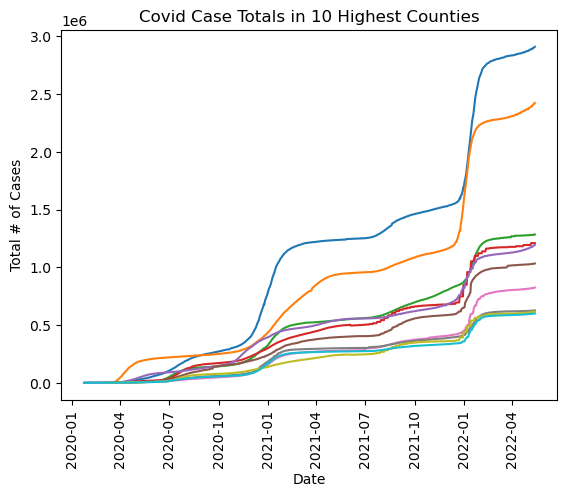

In [9]:
highest_cases_names = pd.DataFrame(last_date_df, columns = ['county', 'state']).head(10)
for index, row in highest_cases_names.iterrows():
    new_df = county_data[(county_data['county'] == row['county']) & (county_data['state'] == row['state'])]
    #sns.lineplot(data=new_df, x='date',y='cases')
    plt.plot(pd.to_datetime(new_df['date']), new_df['cases'])
plt.xlabel('Date')
plt.ylabel('Total # of Cases')
plt.xticks(rotation=90)
plt.title('Covid Case Totals in 10 Highest Counties')
plt.show()

We can take the 10 most populus counties in the US to check to see if the total cases over the past two years is most liekly correlated to a high population.

In [10]:
#Use pop-22 because we check our covid case totals into 2022
county_stats[['county','state','pop_2022']].sort_values(by='pop_2022', ascending=False).head(10)

county       state  pop_2022
192   Los Angeles  California   9721138
1836     New York    New York   8495691
597          Cook    Illinois   5109292
2598       Harris       Texas   4780913
91       Maricopa     Arizona   4551524
210     San Diego  California   3276208
203        Orange  California   3151184
350    Miami-Dade     Florida   2673837
2554       Dallas       Texas   2600840
206     Riverside  California   2473902

As we can see, 9 out of the top 10 most populus counties had the most total COVID-19 cases.

Let's now take a look at the counties with the lowest total COVID-19 cases.

               date     county         state  cases  deaths  cases_change  \
2405690  2022-05-13     Banner      Nebraska     87       2             0   
2405838  2022-05-13    Harding    New Mexico     85       4             0   
2405744  2022-05-13       Loup      Nebraska     79       0             0   
2405769  2022-05-13      Sioux      Nebraska     68       1             0   
2405746  2022-05-13  McPherson      Nebraska     68       1             0   
2405691  2022-05-13     Blaine      Nebraska     65       3             0   
2406061  2022-05-13      Slope  North Dakota     63       0             0   
2406683  2022-05-13       King         Texas     51       0             0   
2405665  2022-05-13  Petroleum       Montana     35       1             0   
2405689  2022-05-13     Arthur      Nebraska     31       1             0   

         deaths_change  
2405690              0  
2405838              0  
2405744              0  
2405769              0  
2405746              0  
24

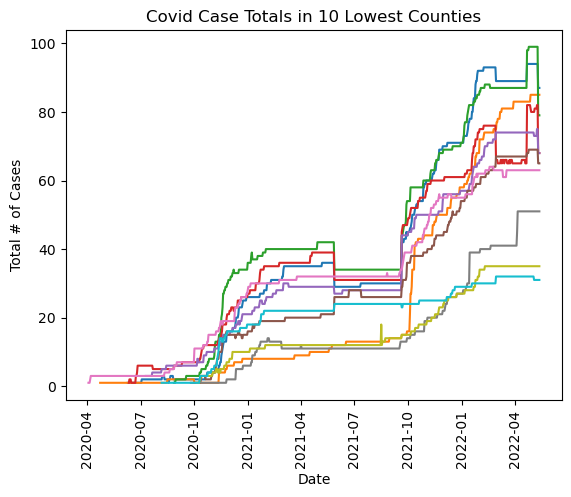

In [11]:
lowest_cases_names = pd.DataFrame(last_date_df, columns = ['county', 'state']).tail(10)
print(last_date_df.tail(10))
for index, row in lowest_cases_names.iterrows():
    new_df = county_data[(county_data['county'] == row['county']) & (county_data['state'] == row['state'])]
    plt.plot(pd.to_datetime(new_df['date']), new_df['cases'])
plt.xlabel('Date')
plt.ylabel('Total # of Cases')
plt.xticks(rotation=90)
plt.title('Covid Case Totals in 10 Lowest Counties')
plt.show()

In [12]:
county_stats[['county','state','pop_2022']].sort_values(by='pop_2022', ascending=True).head(10)

county       state  pop_2022
2631       King       Texas       233
1694  McPherson    Nebraska       372
1638     Arthur    Nebraska       433
1640     Blaine    Nebraska       453
1614  Petroleum     Montana       524
1673      Grant    Nebraska       576
2651   McMullen       Texas       576
2514     Borden       Texas       585
1693       Loup    Nebraska       599
1786    Harding  New Mexico       628

7 of the 10 least populus counties in the US had some of the lowest COVID-19 cases!

Something we can now look into now is comparing these counties and looking at some of their demographics. We will look at the total cases on the last day on our records (5/13/22) compared to our demographics.

In [13]:
# Create x and y values
high_x = last_date_df[['county','state', 'cases']].head(10)
low_x = last_date_df[['county','state', 'cases']].tail(10)

high_y = []
low_y = []
for i in range(len(high_x)):
    high_y.append(county_stats.loc[(county_stats['county'] == high_x.iloc[i, 0]) & (county_stats['state'] == high_x.iloc[i, 1])])
    low_y.append(county_stats.loc[(county_stats['county'] == low_x.iloc[i, 0]) & (county_stats['state'] == low_x.iloc[i, 1])])

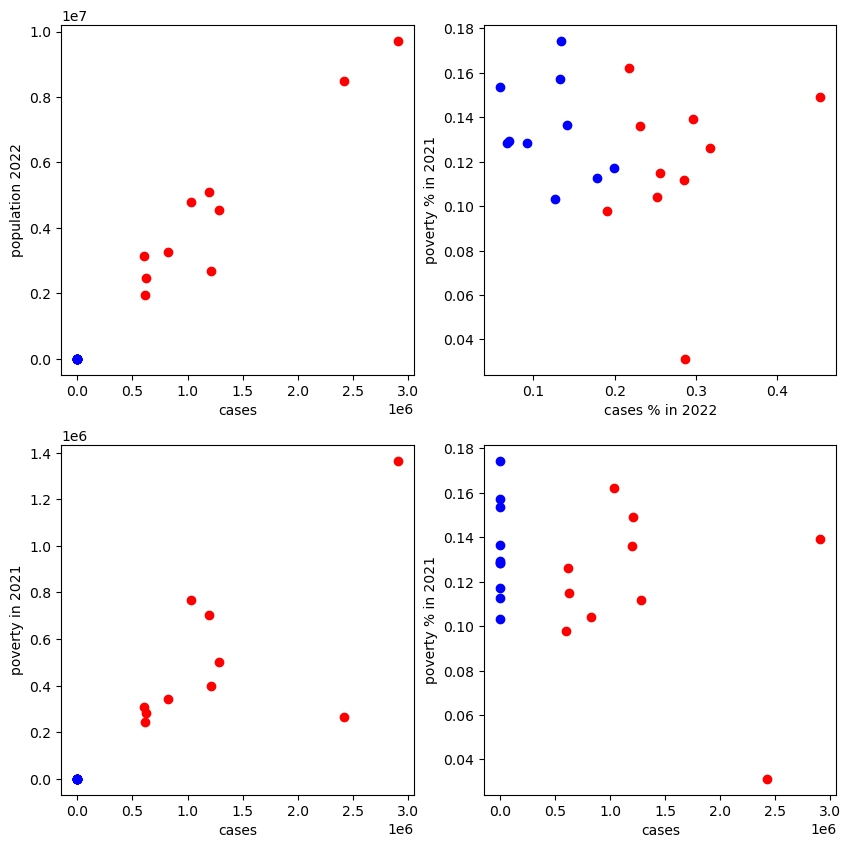

In [14]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
for i in range(len(high_x)):
    axs[0,0].scatter(high_x.iloc[i]['cases'], high_y[i].iloc[0]['pop_2022'], c='red')
    axs[0,0].scatter(low_x.iloc[i]['cases'], low_y[i].iloc[0]['pop_2022'], c='blue')
    axs[0,1].scatter(high_x.iloc[i]['cases']/high_y[i].iloc[0]['pop_2021'], high_y[i].iloc[0]['pov_2021']/high_y[i].iloc[0]['pop_2021'], c='red')
    axs[0,1].scatter(low_x.iloc[i]['cases']/low_y[i].iloc[0]['pop_2021'], low_y[i].iloc[0]['pov_2021']/low_y[i].iloc[0]['pop_2021'], c='blue')
    axs[1,0].scatter(high_x.iloc[i]['cases'], high_y[i].iloc[0]['pov_2021'], c='red')
    axs[1,0].scatter(low_x.iloc[i]['cases'], low_y[i].iloc[0]['pov_2021'], c='blue')
    axs[1,1].scatter(high_x.iloc[i]['cases'], high_y[i].iloc[0]['pov_2021']/high_y[i].iloc[0]['pop_2021'], c='red')
    axs[1,1].scatter(low_x.iloc[i]['cases'], low_y[i].iloc[0]['pov_2021']/low_y[i].iloc[0]['pop_2021'], c='blue')

axs[0,0].set(xlabel='cases', ylabel='population 2022')
axs[0,1].set(xlabel='cases % in 2022',ylabel='poverty % in 2021')
axs[1,0].set(xlabel='cases', ylabel='poverty in 2021')
axs[1,1].set(xlabel='cases', ylabel='poverty % in 2021')
plt.show()

Looking at our graphs, we can notice that because the top counties have such high amount of cases, using percentages to calculate our x and y values will be better to see a relationship. An interesting graph to look at is in the top right as we compare the cases over population percentage vs the poverty percentage. Our data is spread out the most compared to the other graphs but, not neccesarrily the correlation we are looking for. We can instead change our data so that instead of taking the most and least populus counties, we can take the highest and lowest cases over population percentage counties and then compare those data points vs their poverty.

In [15]:
for i,r in county_stats.iterrows():
    county_stats.loc[i,'cases_2022'] = last_date_df[(last_date_df['state'] == r['state']) & (last_date_df['county'] == r['county'])].values[0][3]
    county_stats.loc[i,'cases_percentage_2022'] = (last_date_df[(last_date_df['state'] == r['state']) & (last_date_df['county'] == r['county'])].values[0][3]) / r['pop_2022'] * 100
    county_stats.loc[i,'cases_2021'] = vaccine_date_df[(vaccine_date_df['state'] == r['state']) & (vaccine_date_df['county'] == r['county'])].values[0][3]
    county_stats.loc[i,'cases_percentage_2021'] = (vaccine_date_df[(vaccine_date_df['state'] == r['state']) & (vaccine_date_df['county'] == r['county'])].values[0][3]) / r['pop_2021'] * 100
    county_stats.loc[i,'cases_2020'] = early_date_df[(early_date_df['state'] == r['state']) & (early_date_df['county'] == r['county'])].values[0][3]
    county_stats.loc[i,'cases_percentage_2020'] = (early_date_df[(early_date_df['state'] == r['state']) & (early_date_df['county'] == r['county'])].values[0][3]) / r['pop_2020'] * 100
county_stats.sort_values(by='cases_percentage_2022').head(10)

state        county  pop_2020  pop_2021  pop_2022  \
1742        Nevada        Storey      4106      4145      4170   
1718      Nebraska         Sioux      1144      1151      1127   
1614       Montana     Petroleum       500       522       524   
1638      Nebraska        Arthur       432       441       433   
2953    Washington      San Juan     17827     18615     18662   
2897      Virginia  Fairfax city     24175     24391     24835   
1734        Nevada        Eureka      1853      1909      1863   
2009  North Dakota         Slope       695       686       672   
226     California       Trinity     16089     16061     15781   
2941    Washington     Jefferson     33063     33561     33589   

      Less than a high school diploma  High school diploma only  \
1742                              184                       825   
1718                               40                       194   
1614                                2                       137   
1638                               14                        77   
2953                              620                      2372   
2897                             1176                      2210   
1734                               50                       418   
2009                               52                       173   
226                               764                      4800   
2941                             1057                      5832   

      Some college or associate's degree  Bachelor's degree or higher  \
1742                                1173                          860   
1718                                 336                          195   
1614                                  99                           94   
1638                                 139                           90   
2953                                4052                         7413   
2897                                2931                        10038   
1734                                 432                          112   
2009                                 203                          152   
226                                 4605                         2324   
2941                                8799                        11695   

      Percent of adults with less than a high school diploma  \
1742                                                6.0        
1718                                                5.2        
1614                                                0.6        
1638                                                4.4        
2953                                                4.3        
2897                                                7.2        
1734                                                4.9        
2009                                                9.0        
226                                                 6.1        
2941                                                3.9        

      Percent of adults with a high school diploma only  \
1742                                               27.1   
1718                                               25.4   
1614                                               41.3   
1638                                               24.1   
2953                                               16.4   
2897                                               13.5   
1734                                               41.3   
2009                                               29.8   
226                                                38.4   
2941                                               21.3   

      Percent of adults completing some college or associate's degree  \
1742                                               38.6                 
1718                                               43.9                 
1614                                               29.8                 
1638                                               43.4                 
2953                    

In [16]:
# Add a new pov_percentage column
county_stats['pov_percentage'] = county_stats['pov_2021'] / county_stats['pop_2021'] * 100
county_stats.head()

state   county  pop_2020  pop_2021  pop_2022  \
0  Alabama  Autauga     58902     59210     59759   
1  Alabama  Baldwin    233219    239361    246435   
2  Alabama  Barbour     24960     24539     24706   
3  Alabama     Bibb     22183     22370     22005   
4  Alabama   Blount     59102     59085     59512   

   Less than a high school diploma  High school diploma only  \
0                             4126                     12977   
1                            14555                     44342   
2                             4378                      6600   
3                             3125                      7052   
4                             6650                     14284   

   Some college or associate's degree  Bachelor's degree or higher  \
0                               11367                        11144   
1                               50518                        52562   
2                                5010                         2007   
3                                3967                         1913   
4                               13673                         6061   

   Percent of adults with less than a high school diploma  \
0                                               10.4        
1                                                9.0        
2                                               24.3        
3                                               19.5        
4                                               16.4        

   Percent of adults with a high school diploma only  \
0                                               32.8   
1                                               27.4   
2                                               36.7   
3                                               43.9   
4                                               35.1   

   Percent of adults completing some college or associate's degree  \
0                                               28.7                 
1                                               31.2                 
2                                               27.8                 
3                                               24.7                 
4                                               33.6                 

   Percent of adults with a bachelor's degree or higher  pov_2021  \
0                                               28.1       6296.0   
1                                               32.5      25526.0   
2                                               11.2       5089.0   
3                                               11.9       4204.0   
4                                               14.9       6992.0   

   Percent Caucasian  Percent African American  Percent Indian  Percent Asian  \
0          72.538293                 19.735487        2.294375       2.188184   
1          82.422303                  8.450824        2.812900       1.413522   
2          45.966966                 47.206715        1.393755       0.585223   
3          74.715626                 20.081311        1.859781       0.242204   
4          86.188161                  1.985829        2.900899       0.568741   

   Percent Pacific  avg_house_size  pop_density  cases_2022  \
0         0.185030            2.59    35.853419     15863.0   
1         0.143049            2.61    50.541504     55862.0   
2         0.050052            2.49    11.247981      5681.0   
3         0.077851            2.99    13.973114      6457.0   
4         0.104852            2.77    34.515816     15005.0   

   cases_percentage_2022  cases_2021  cases_percentage_2021  cases_2020  \
0              26.544956      7150.0              12.075663      2417.0   
1              22.668046     21661.0               9.049511      7523.0   
2              22.994414      2337.0               9.523615      1117.0   
3              29.343331      2665.0              11.913277       973.0   
4              25.213402      6887.0              11.656089      2488.0   

   cases_percentage_202

In [17]:
# Create x and y values
county_stats = county_stats.sort_values(by='cases_percentage_2022')
high_values_cases = county_stats.tail(10)
low_values_cases = county_stats.head(10)

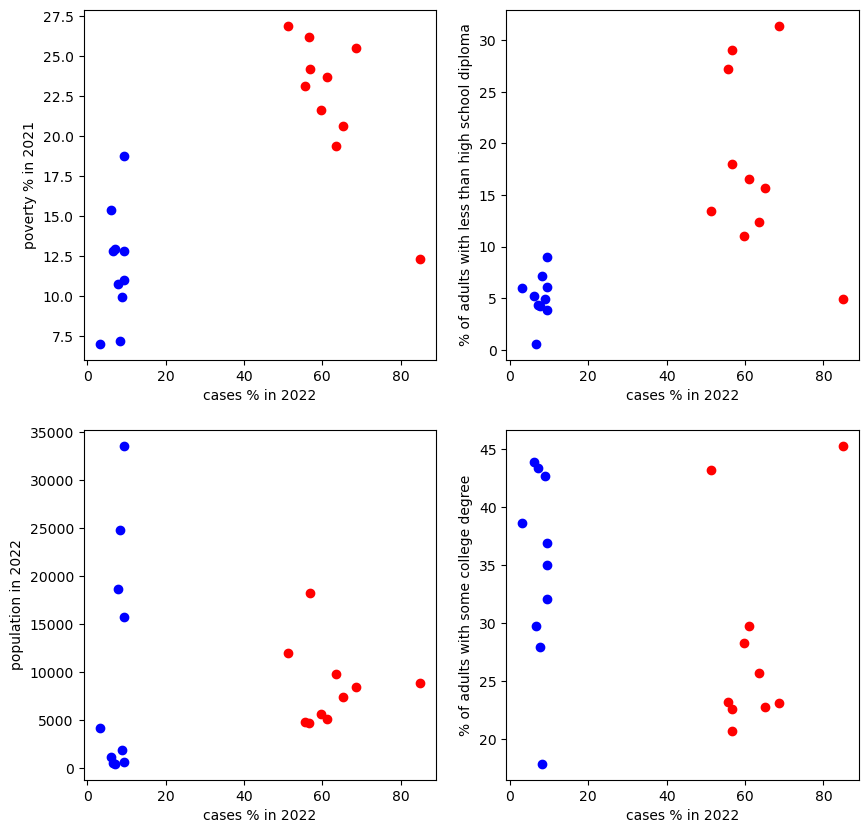

In [18]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
for i in range(len(high_values_cases)):
    axs[0,0].scatter(high_values_cases.iloc[i]['cases_percentage_2022'], high_values_cases.iloc[i]['pov_percentage'], c='red')
    axs[0,0].scatter(low_values_cases.iloc[i]['cases_percentage_2022'], low_values_cases.iloc[i]['pov_percentage'], c='blue')
    axs[0,1].scatter(high_values_cases.iloc[i]['cases_percentage_2022'], high_values_cases.iloc[i]['Percent of adults with less than a high school diploma'], c='red')
    axs[0,1].scatter(low_values_cases.iloc[i]['cases_percentage_2022'], low_values_cases.iloc[i]['Percent of adults with less than a high school diploma'], c='blue')
    axs[1,0].scatter(high_values_cases.iloc[i]['cases_percentage_2022'], high_values_cases.iloc[i]['pop_2022'], c='red')
    axs[1,0].scatter(low_values_cases.iloc[i]['cases_percentage_2022'], low_values_cases.iloc[i]['pop_2022'], c='blue')
    axs[1,1].scatter(high_values_cases.iloc[i]['cases_percentage_2022'], high_values_cases.iloc[i]['Percent of adults completing some college or associate\'s degree'], c='red')
    axs[1,1].scatter(low_values_cases.iloc[i]['cases_percentage_2022'], low_values_cases.iloc[i]['Percent of adults completing some college or associate\'s degree'], c='blue')

axs[0,0].set(xlabel='cases % in 2022', ylabel='poverty % in 2021')
axs[0,1].set(xlabel='cases % in 2022',ylabel='% of adults with less than high school diploma')
axs[1,0].set(xlabel='cases % in 2022', ylabel='population in 2022')
axs[1,1].set(xlabel='cases % in 2022', ylabel='% of adults with some college degree')
plt.show()

Some notes to make is the slight correlation for the top two graphs we developed in which counties with a higher case percentage also had a higher poverty and non high school diploma rate.

We can also now look at it from the other approach

In [19]:
# sort by pov_percentage
county_stats = county_stats.sort_values(by='pov_percentage')
# Create x and y values
high_values_pov = county_stats.tail(10)
low_values_pov = county_stats.head(10)
high_values_pov50 = county_stats.tail(50)
low_values_pov50 = county_stats.head(50)
# retrieve values for education
county_stats = county_stats.sort_values(by='Percent of adults with less than a high school diploma')
high_values_hs = county_stats.tail(10)
low_values_hs = county_stats.head(10)
county_stats = county_stats.sort_values(by='Percent of adults completing some college or associate\'s degree')
high_values_college = county_stats.tail(10)
low_values_college = county_stats.head(10)

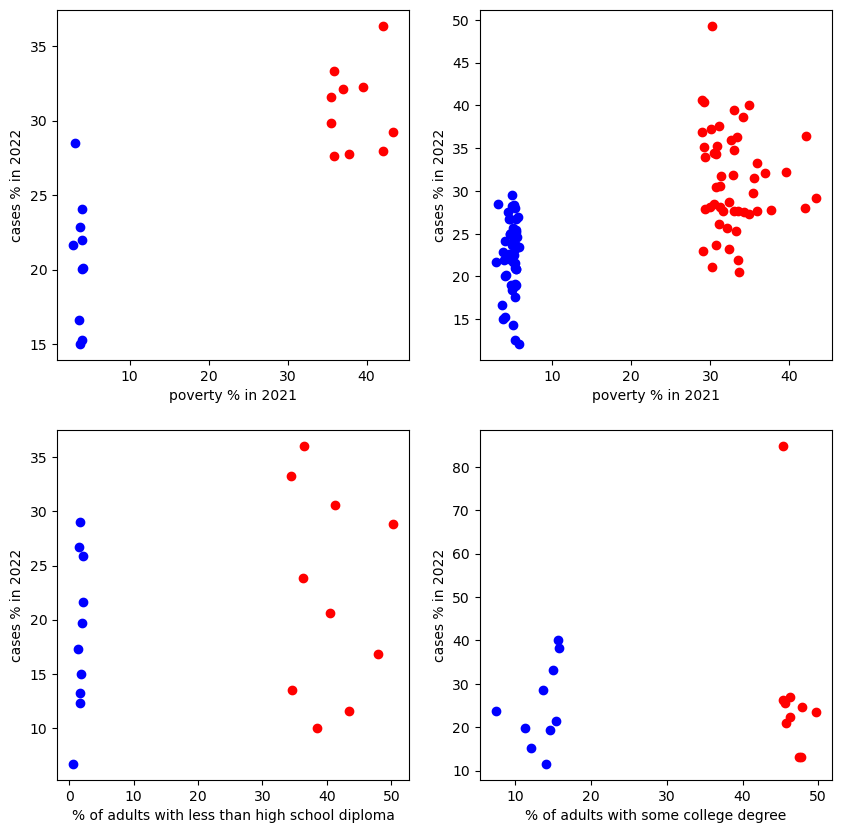

In [20]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
for i in range(len(high_values_pov)):
    axs[0,0].scatter(high_values_pov.iloc[i]['pov_percentage'], high_values_pov.iloc[i]['cases_percentage_2022'], c='red')
    axs[0,0].scatter(low_values_pov.iloc[i]['pov_percentage'], low_values_pov.iloc[i]['cases_percentage_2022'], c='blue')
    axs[1,0].scatter(high_values_hs.iloc[i]['Percent of adults with less than a high school diploma'], high_values_hs.iloc[i]['cases_percentage_2022'], c='red')
    axs[1,0].scatter(low_values_hs.iloc[i]['Percent of adults with less than a high school diploma'], low_values_hs.iloc[i]['cases_percentage_2022'], c='blue')
    axs[1,1].scatter(high_values_college.iloc[i]['Percent of adults completing some college or associate\'s degree'], high_values_college.iloc[i]['cases_percentage_2022'], c='red')
    axs[1,1].scatter(low_values_college.iloc[i]['Percent of adults completing some college or associate\'s degree'], low_values_college.iloc[i]['cases_percentage_2022'], c='blue')
for i in range(len(high_values_pov50)):
    axs[0,1].scatter(high_values_pov50.iloc[i]['pov_percentage'], high_values_pov50.iloc[i]['cases_percentage_2022'], c='red')
    axs[0,1].scatter(low_values_pov50.iloc[i]['pov_percentage'], low_values_pov50.iloc[i]['cases_percentage_2022'], c='blue')

axs[0,0].set(xlabel='poverty % in 2021', ylabel='cases % in 2022')
axs[0,1].set(xlabel='poverty % in 2021',ylabel='cases % in 2022')
axs[1,0].set(xlabel='% of adults with less than high school diploma', ylabel='cases % in 2022')
axs[1,1].set(xlabel='% of adults with some college degree', ylabel='cases % in 2022')
plt.show()

We can see some correlation going the other way comparing poverty and case percentage.

In [21]:
# sort by density and avg house size
county_stats = county_stats.sort_values(by='pop_density')
high_values_den = county_stats.tail(10)
low_values_den = county_stats.head(10)
county_stats = county_stats.sort_values(by='avg_house_size')
high_values_house = county_stats.tail(10)
low_values_house = county_stats.head(10)
high_values_den

state                county  pop_2020  pop_2021  \
2898              Virginia     Falls Church city     14677     14546   
1198              Maryland        Baltimore city    583139    576981   
2799              Virginia             Arlington    238799    233574   
2888              Virginia       Alexandria city    159125    155203   
307   District of Columbia  District of Columbia    670868    668791   
2269          Pennsylvania          Philadelphia   1600600   1589480   
1211         Massachusetts               Suffolk    793271    771765   
1764            New Jersey                Hudson    721832    703447   
211             California         San Francisco    870393    811253   
1836              New York              New York   8772978   8467513   

      pop_2022  Less than a high school diploma  High school diploma only  \
2898     14586                              262                       639   
1198    569931                            56716                    116662   
2799    234000                             8860                     12874   
2888    155525                             8213                     12509   
307     671803                            37934                     75562   
2269   1567258                           147268                    343452   
1211    766381                            71809                    115175   
1764    703366                            67627                    121831   
211     808437                            77300                     78359   
1836   8495691                           148767                    156704   

      Some college or associate's degree  Bachelor's degree or higher  \
2898                                1178                         7681   
1198                               99620                       141930   
2799                               19373                       132370   
2888                               21018                        78147   
307                                74761                       299469   
2269                              248140                       356096   
1211                               99726                       266176   
1764                               88493                       233671   
211                               123258                       410052   
1836                              174128                       801081   

      Percent of adults with less than a high school diploma  \
2898                                                2.7        
1198                                               13.7        
2799                                                5.1        
2888                                                6.9        
307                                                 7.8        
2269                                               13.4        
1211                                               13.0        
1764                                               13.2        
211                                                11.2        
1836                                               11.6        

      Percent of adults with a high school diploma only  \
2898                                                6.5   
1198                                               28.1   
2799                                                7.4   
2888                                               10.4   
307                                                15.5   
2269                                               31.4   
1211                                               20.8   
1764                                               23.8   
211                                                11.4   
1836                                               12.2   

      Percent of adults completing some college or associate's degree  \
2898                                               12.1                 
1198                                               24.0                 
27

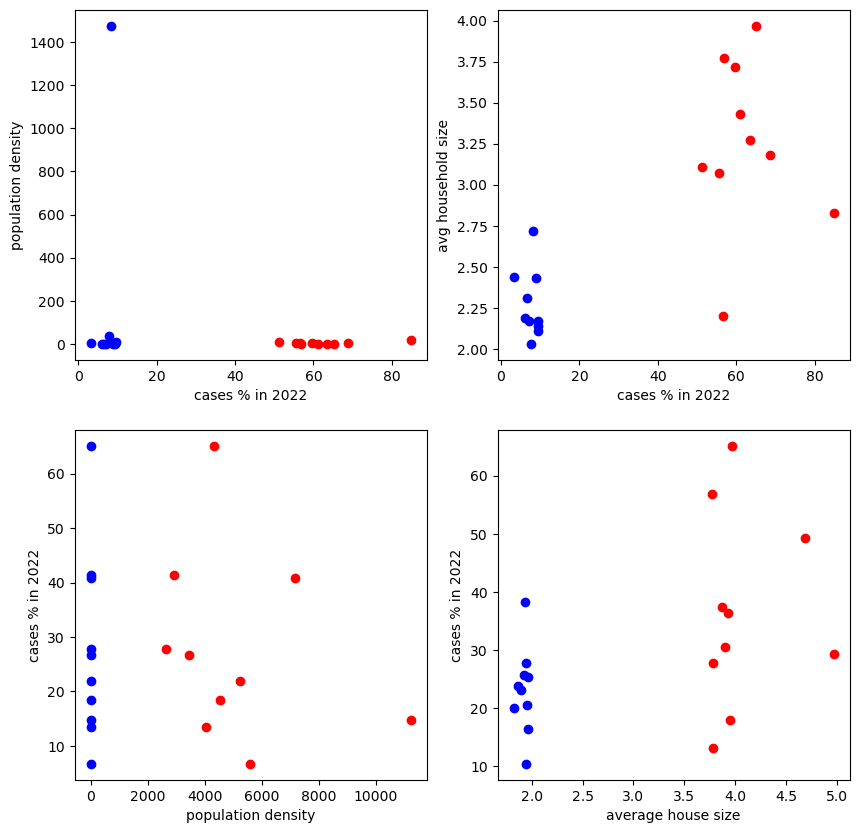

In [22]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
for i in range(len(high_values_pov)):
    axs[0,0].scatter(high_values_cases.iloc[i]['cases_percentage_2022'], high_values_cases.iloc[i]['pop_density'], c='red')
    axs[0,0].scatter(low_values_cases.iloc[i]['cases_percentage_2022'], low_values_cases.iloc[i]['pop_density'], c='blue')
    axs[0,1].scatter(high_values_cases.iloc[i]['cases_percentage_2022'], high_values_cases.iloc[i]['avg_house_size'], c='red')
    axs[0,1].scatter(low_values_cases.iloc[i]['cases_percentage_2022'], low_values_cases.iloc[i]['avg_house_size'], c='blue')
    axs[1,0].scatter(high_values_den.iloc[i]['pop_density'], low_values_den.iloc[i]['cases_percentage_2022'], c='red')
    axs[1,0].scatter(low_values_den.iloc[i]['pop_density'], low_values_den.iloc[i]['cases_percentage_2022'], c='blue')
    axs[1,1].scatter(high_values_house.iloc[i]['avg_house_size'], high_values_house.iloc[i]['cases_percentage_2022'], c='red')
    axs[1,1].scatter(low_values_house.iloc[i]['avg_house_size'], low_values_house.iloc[i]['cases_percentage_2022'], c='blue')

axs[0,0].set(xlabel='cases % in 2022', ylabel='population density')
axs[0,1].set(xlabel='cases % in 2022',ylabel='avg household size')
axs[1,0].set(xlabel='population density', ylabel='cases % in 2022')
axs[1,1].set(xlabel='average house size', ylabel='cases % in 2022')
plt.show()

Let's look at a new date. The date is question is June 1st of 2021. We can see from https://www.nytimes.com/interactive/2021/us/covid-cases.html that cases dropped after the vaccine in December of 2020 came out and was slowing rolling out towards the public. The vaccine was made public to everyone over the age over 16 in late April so it makes sense to look at June 1st because people needed two doses of the vaccine.

In [23]:
# Make new sorted arrays
county_stats = county_stats.sort_values(by='cases_percentage_2021')
vaccine_high_cases = county_stats.tail(10)
vaccine_low_cases = county_stats.head(10)

vaccine_high_x = vaccine_date_df.head(10)
vaccine_low_x = vaccine_date_df.tail(10)

vaccine_high_y = []
vaccine_low_y = []
for i in range(len(high_x)):
    vaccine_high_y.append(county_stats.loc[(county_stats['county'] == vaccine_high_x.iloc[i]['county']) & (county_stats['state'] == vaccine_high_x.iloc[i]['state'])])
    vaccine_low_y.append(county_stats.loc[(county_stats['county'] == vaccine_low_x.iloc[i]['county']) & (county_stats['state'] == vaccine_low_x.iloc[i]['state'])])
vaccine_low_x

date     county       state  cases  deaths  cases_change  \
1327046  2021-06-01     Borden       Texas     30       2             0   
1326170  2021-06-01     Banner    Nebraska     29       0             0   
1324601  2021-06-01     Haines      Alaska     28       0             0   
1326226  2021-06-01  McPherson    Nebraska     27       1             0   
1326171  2021-06-01     Blaine    Nebraska     26       0             0   
1326169  2021-06-01     Arthur    Nebraska     24       0             0   
1324789  2021-06-01   Hinsdale    Colorado     18       0             0   
1326318  2021-06-01    Harding  New Mexico     12       1             0   
1326145  2021-06-01  Petroleum     Montana     12       1             0   
1327163  2021-06-01       King       Texas     11       0             0   

         deaths_change  
1327046              0  
1326170              0  
1324601              0  
1326226              0  
1326171              0  
1326169              0  
1324789              0  
1326318              0  
1326145              0  
1327163              0

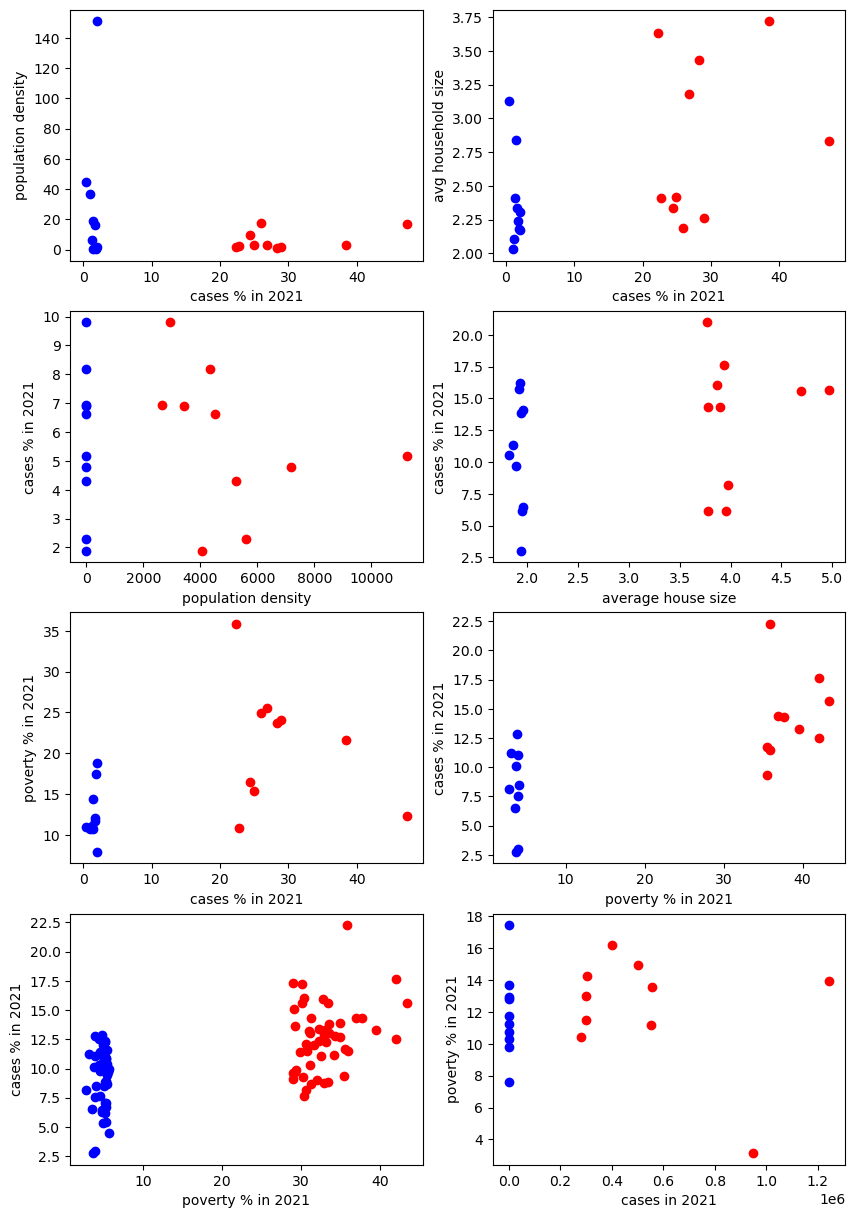

In [24]:
fig, axs = plt.subplots(4,2, figsize=(10,15))
for i in range(len(high_values_pov)):
    axs[0,0].scatter(vaccine_high_cases.iloc[i]['cases_percentage_2021'], vaccine_high_cases.iloc[i]['pop_density'], c='r')
    axs[0,0].scatter(vaccine_low_cases.iloc[i]['cases_percentage_2021'], vaccine_low_cases.iloc[i]['pop_density'], c='b')
    axs[0,1].scatter(vaccine_high_cases.iloc[i]['cases_percentage_2021'], vaccine_high_cases.iloc[i]['avg_house_size'], c='r')
    axs[0,1].scatter(vaccine_low_cases.iloc[i]['cases_percentage_2021'], vaccine_low_cases.iloc[i]['avg_house_size'], c='b')
    axs[1,0].scatter(high_values_den.iloc[i]['pop_density'], low_values_den.iloc[i]['cases_percentage_2021'], c='r')
    axs[1,0].scatter(low_values_den.iloc[i]['pop_density'], low_values_den.iloc[i]['cases_percentage_2021'], c='b')
    axs[1,1].scatter(high_values_house.iloc[i]['avg_house_size'], high_values_house.iloc[i]['cases_percentage_2021'], c='r')
    axs[1,1].scatter(low_values_house.iloc[i]['avg_house_size'], low_values_house.iloc[i]['cases_percentage_2021'], c='b')
    axs[2,0].scatter(vaccine_high_cases.iloc[i]['cases_percentage_2021'], vaccine_high_cases.iloc[i]['pov_percentage'], c='r')
    axs[2,0].scatter(vaccine_low_cases.iloc[i]['cases_percentage_2021'], vaccine_low_cases.iloc[i]['pov_percentage'], c='b')
    axs[2,1].scatter(high_values_pov.iloc[i]['pov_percentage'], high_values_pov.iloc[i]['cases_percentage_2021'], c='r')
    axs[2,1].scatter(low_values_pov.iloc[i]['pov_percentage'], low_values_pov.iloc[i]['cases_percentage_2021'], c='b')
    axs[3,1].scatter(vaccine_high_x.iloc[i]['cases'], vaccine_high_y[i].iloc[0]['pov_percentage'], c='r')
    axs[3,1].scatter(vaccine_low_x.iloc[i]['cases'], vaccine_low_y[i].iloc[0]['pov_percentage'], c='b')
    
for i in range(len(high_values_pov50)):
    axs[3,0].scatter(high_values_pov50.iloc[i]['pov_percentage'], high_values_pov50.iloc[i]['cases_percentage_2021'], c='r')
    axs[3,0].scatter(low_values_pov50.iloc[i]['pov_percentage'], low_values_pov50.iloc[i]['cases_percentage_2021'], c='b')

axs[0,0].set(xlabel='cases % in 2021', ylabel='population density')
axs[0,1].set(xlabel='cases % in 2021',ylabel='avg household size')
axs[1,0].set(xlabel='population density', ylabel='cases % in 2021')
axs[1,1].set(xlabel='average house size', ylabel='cases % in 2021')
axs[2,0].set(xlabel='cases % in 2021', ylabel='poverty % in 2021')
axs[2,1].set(xlabel='poverty % in 2021', ylabel='cases % in 2021')
axs[3,0].set(xlabel='poverty % in 2021', ylabel='cases % in 2021')
axs[3,1].set(xlabel='cases in 2021', ylabel='poverty % in 2021')
plt.show()

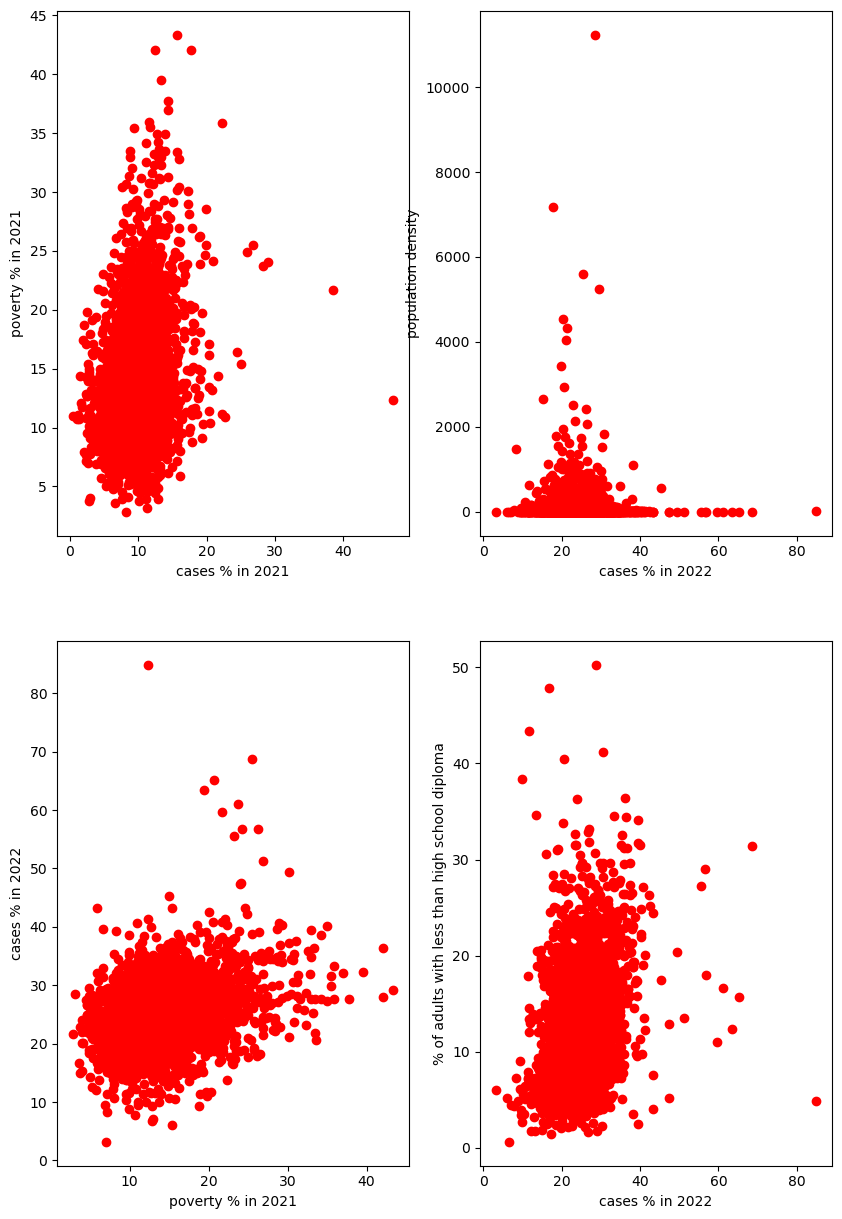

In [25]:
fig, axs = plt.subplots(2,2, figsize=(10,15))
for i in range(len(county_stats)):
    axs[0,0].scatter(county_stats.iloc[i]['cases_percentage_2021'], county_stats.iloc[i]['pov_percentage'], c='r')
    axs[0,1].scatter(county_stats.iloc[i]['cases_percentage_2022'], county_stats.iloc[i]['pop_density'], c='r')
    axs[1,0].scatter(county_stats.iloc[i]['pov_percentage'], county_stats.iloc[i]['cases_percentage_2022'], c='r')
    axs[1,1].scatter(county_stats.iloc[i]['cases_percentage_2022'], county_stats.iloc[i]['Percent of adults with less than a high school diploma'], c='r')
    
axs[0,0].set(xlabel='cases % in 2021', ylabel='poverty % in 2021')
axs[0,1].set(xlabel='cases % in 2022', ylabel='population density')
axs[1,0].set(xlabel='poverty % in 2021', ylabel='cases % in 2022')
axs[1,1].set(xlabel='cases % in 2022', ylabel='% of adults with less than high school diploma')
plt.show()

Since we are not finding a clear trend, lets take a look at a histogram and heatmap

C:\Users\matth\AppData\Local\Temp\ipykernel_22604\663203697.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  county_stats.hist(column=['cases_percentage_2020', 'cases_percentage_2021', 'cases_percentage_2022'], bins=25, grid=False, ax=ax)


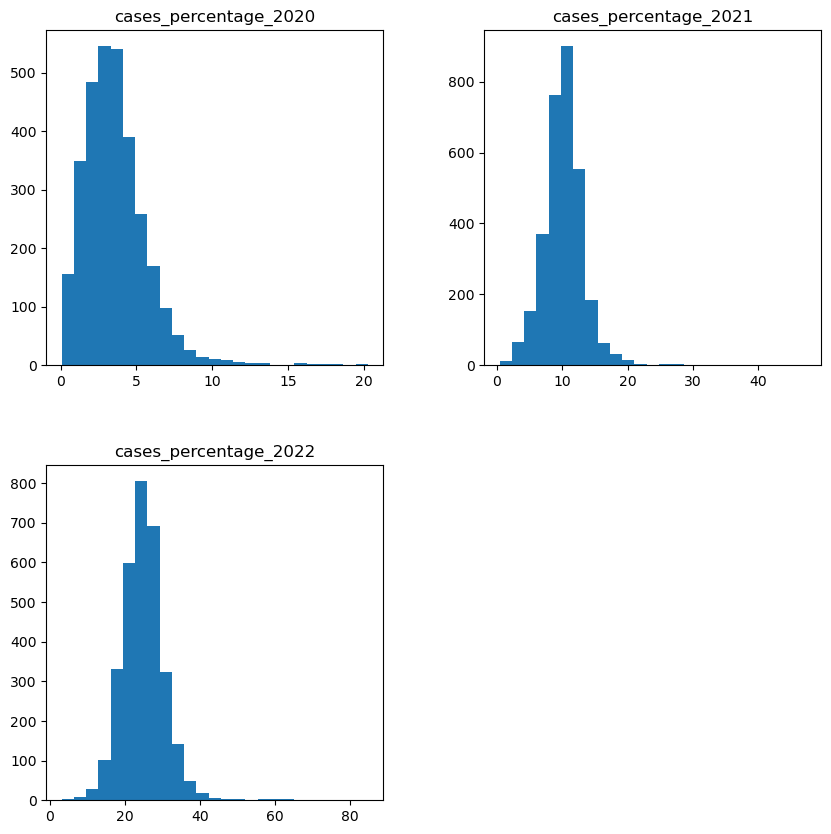

In [26]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
county_stats.hist(column=['cases_percentage_2020', 'cases_percentage_2021', 'cases_percentage_2022'], bins=25, grid=False, ax=ax)
plt.show()

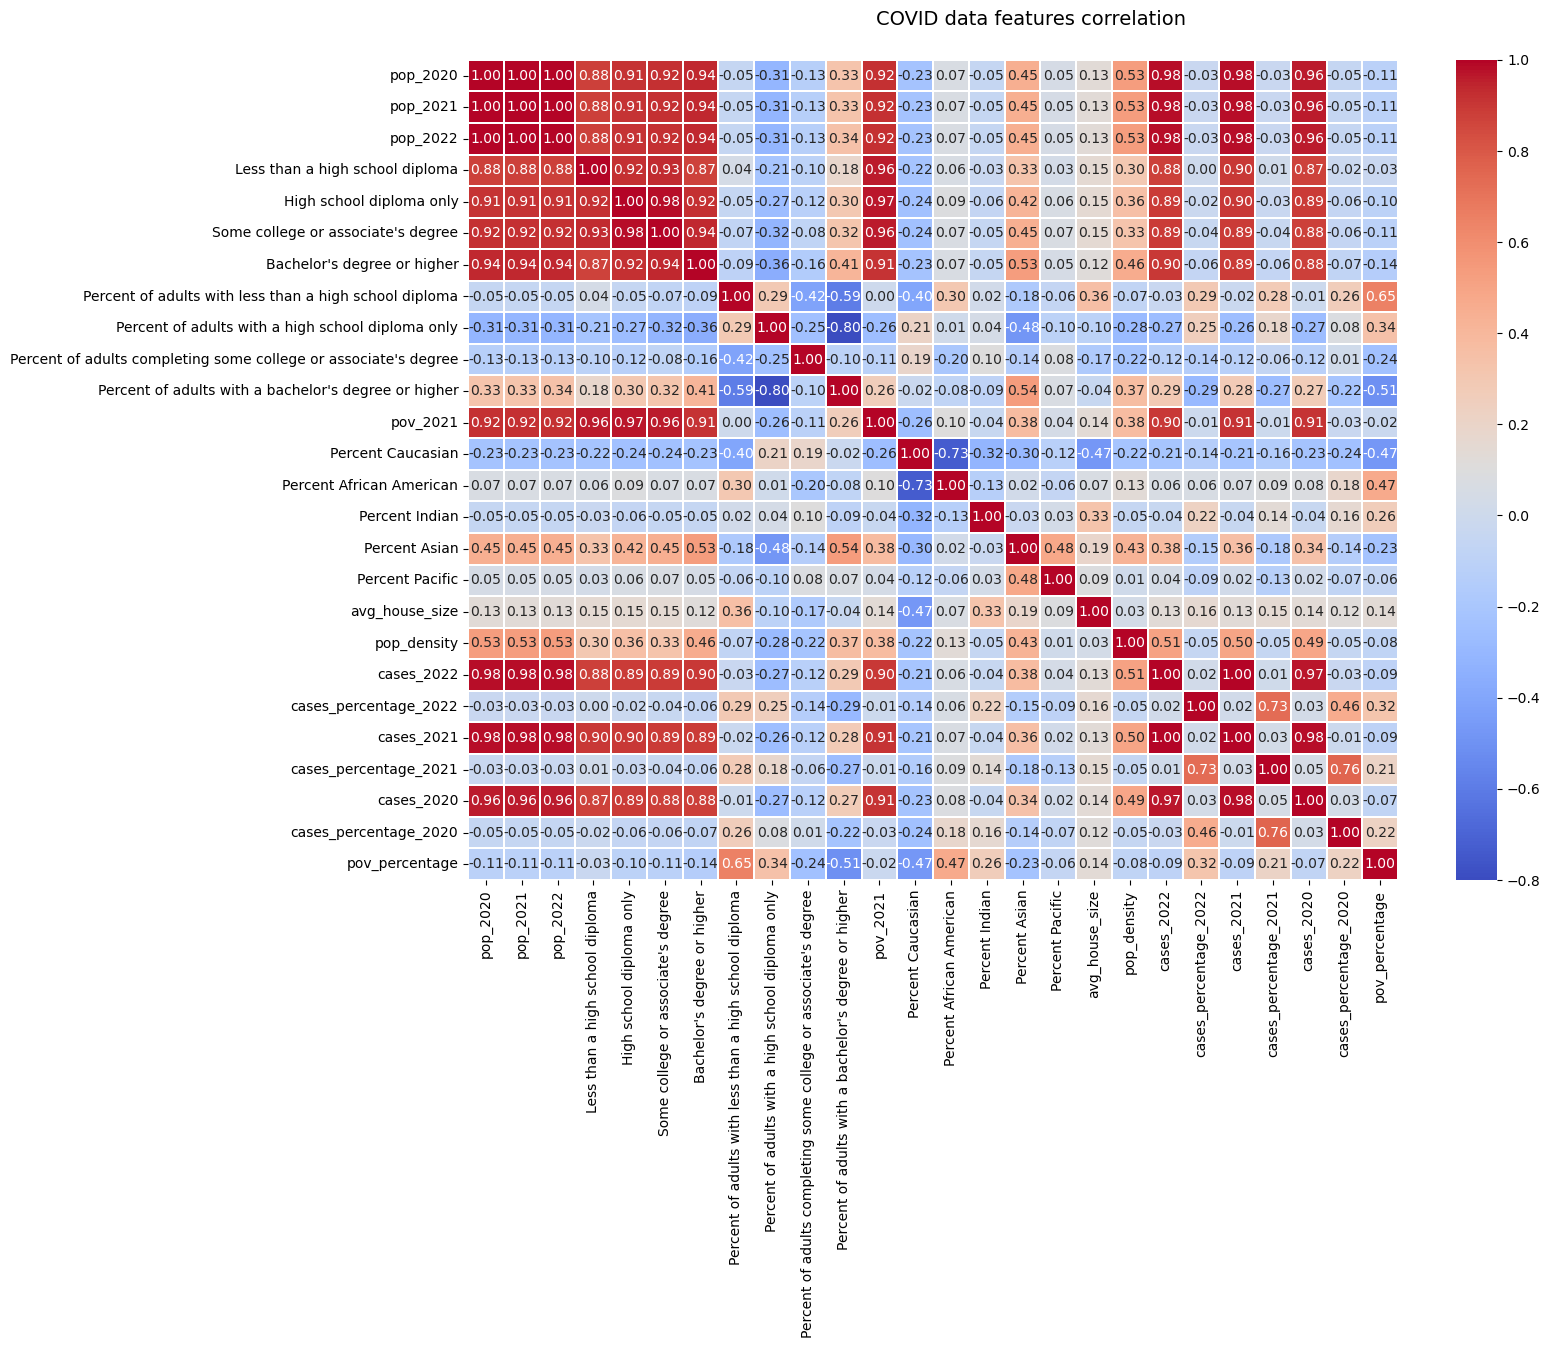

In [27]:
corrmat = county_stats.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(15, 10))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('COVID data features correlation', fontsize=14)

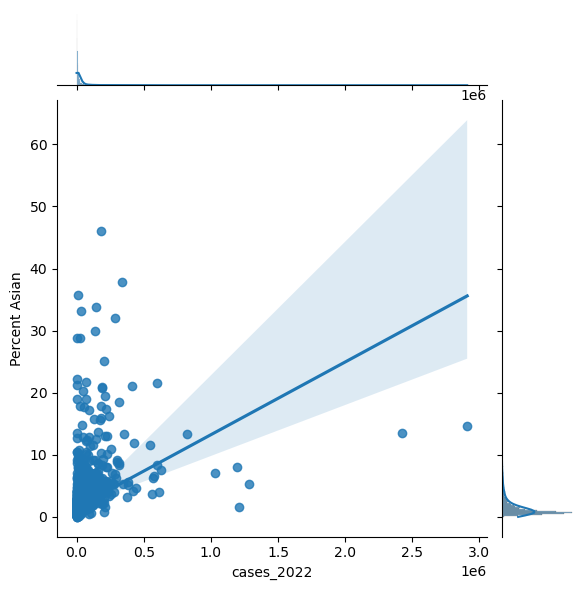

In [28]:
sns.jointplot(x='cases_2022', y='Percent Asian', data=county_stats, kind="reg");

Let's look specically at counties in the top 50 or bottom 50 percentile in 2022

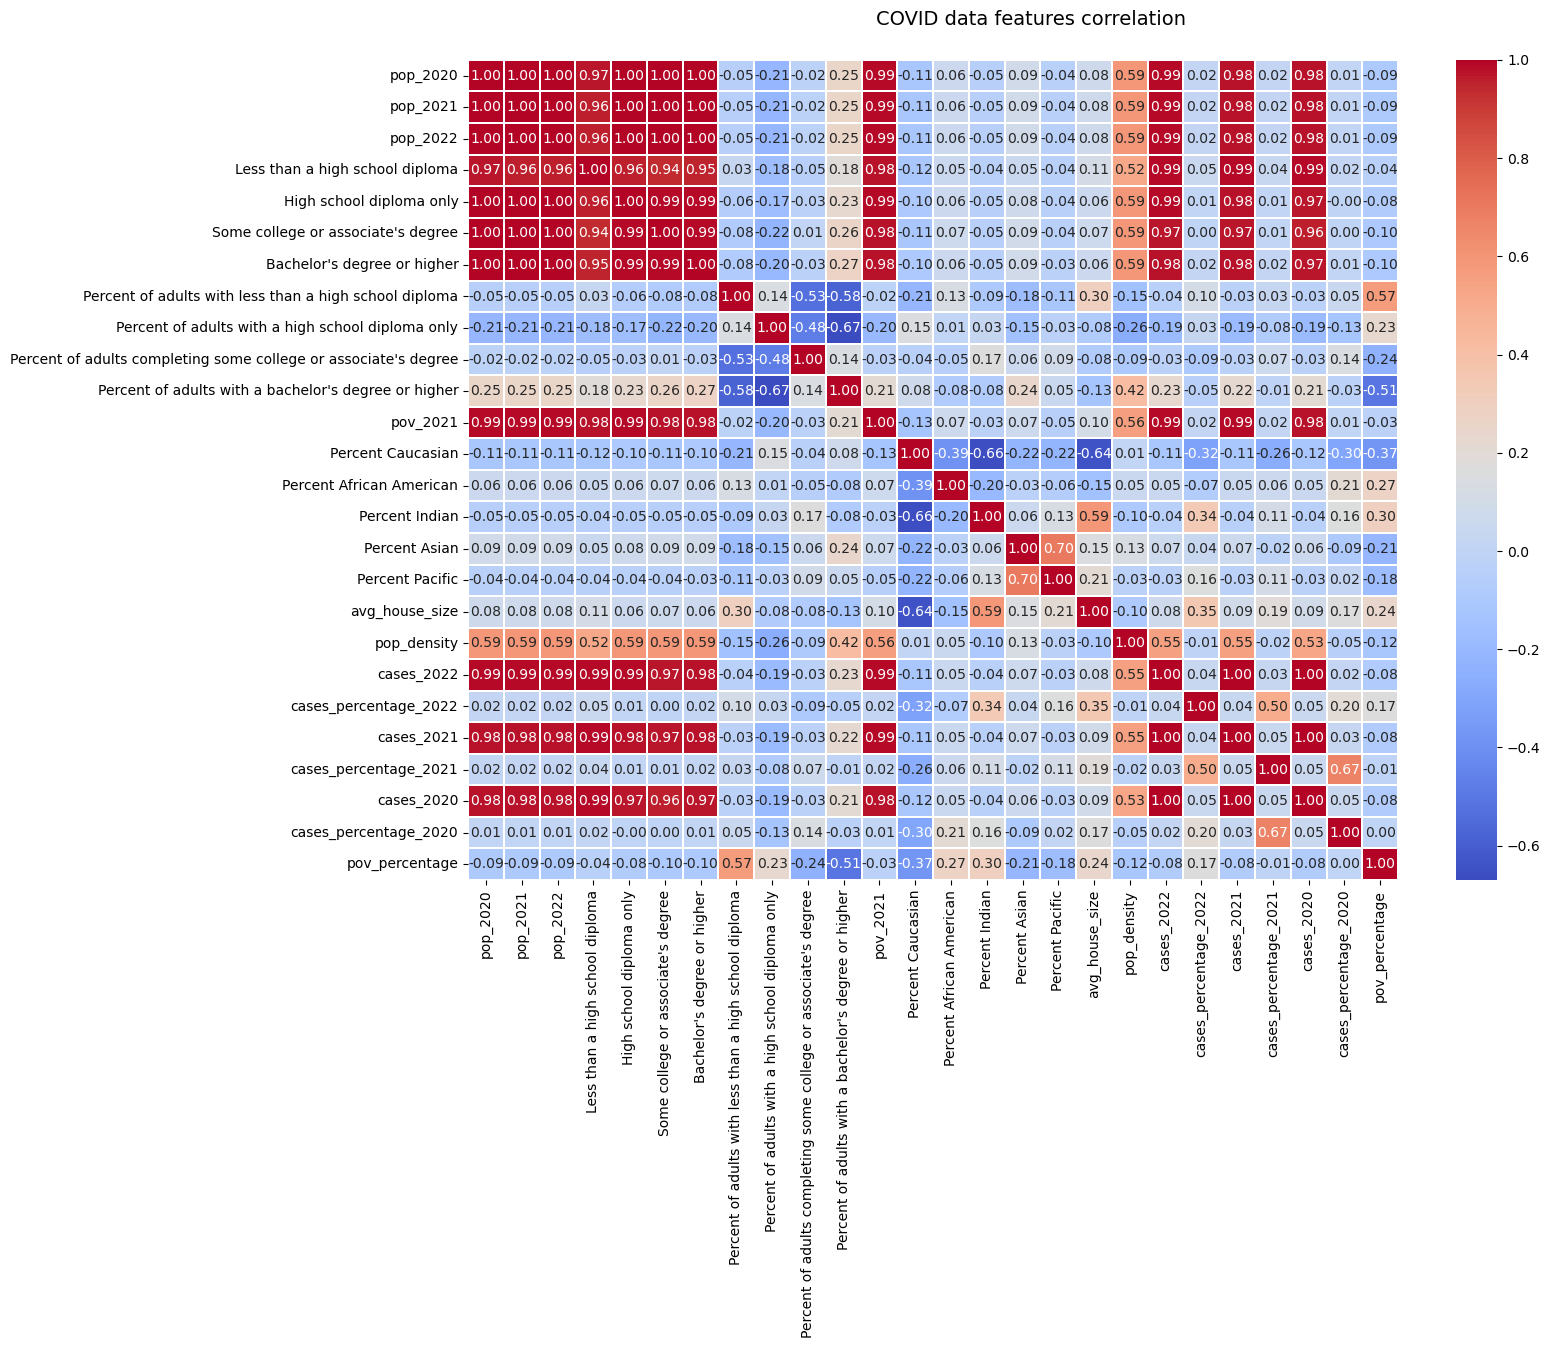

In [29]:
county_stats_high = county_stats[(county_stats['cases_percentage_2022'] >= county_stats['cases_percentage_2022'].quantile(.9))]
corrmat = county_stats_high.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(15, 10))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('COVID data features correlation', fontsize=14)

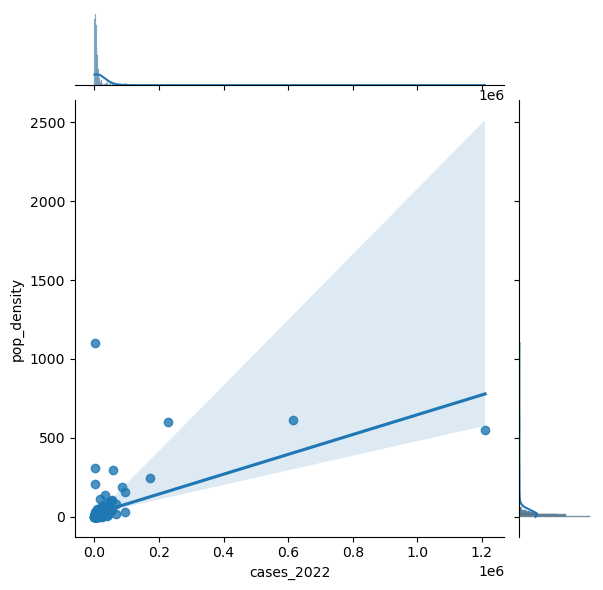

In [30]:
sns.jointplot(x='cases_2022', y='pop_density', data=county_stats_high, kind="reg");

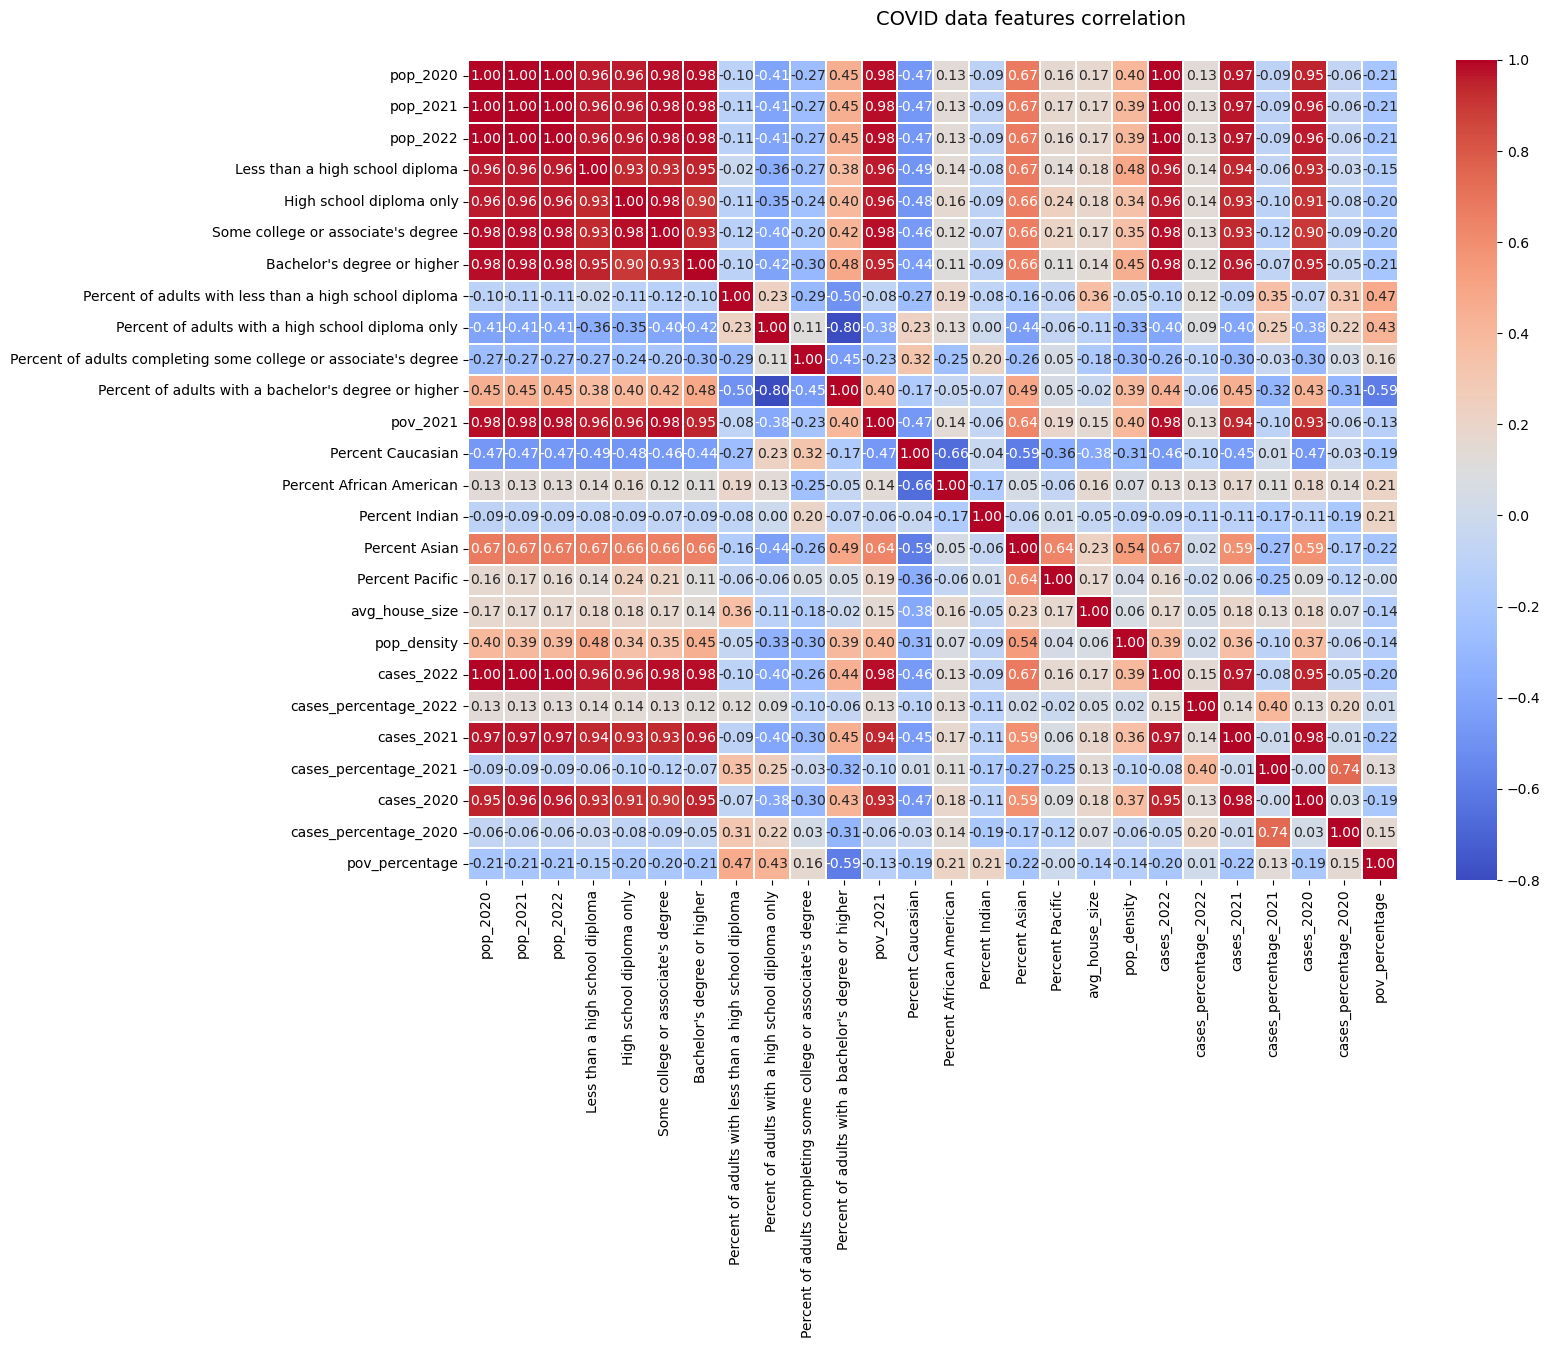

In [31]:
county_stats_low = county_stats[county_stats['cases_percentage_2022'] <= county_stats['cases_percentage_2022'].quantile(.1)]
corrmat = county_stats_low.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(15, 10))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('COVID data features correlation', fontsize=14)

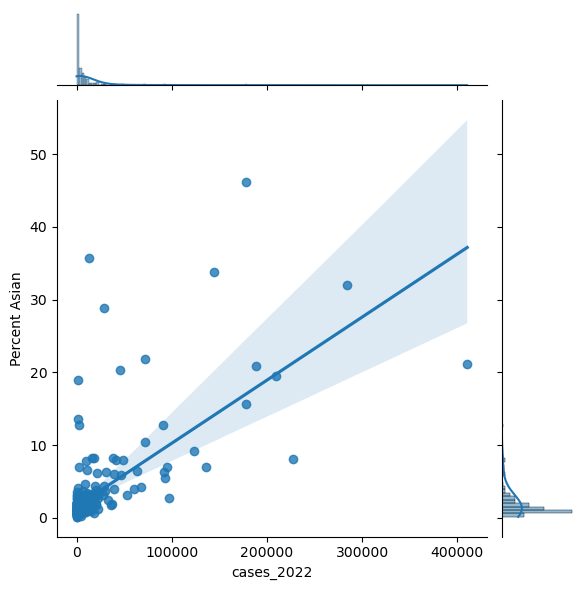

In [32]:
sns.jointplot(x='cases_2022', y='Percent Asian', data=county_stats_low, kind="reg");

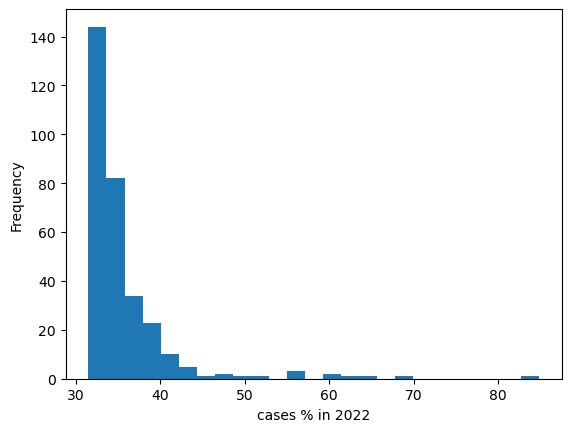

In [33]:
ax = county_stats_high.cases_percentage_2022.plot(kind='hist', bins=25)
ax.set_xlabel("cases % in 2022")
plt.show()

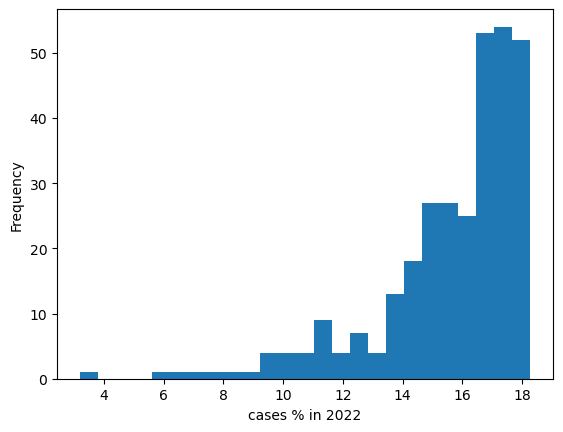

In [34]:
ax = county_stats_low.cases_percentage_2022.plot(kind='hist', bins=25)
ax.set_xlabel("cases % in 2022")
plt.show()

Let's also group our data by state and look at their details aggregated.

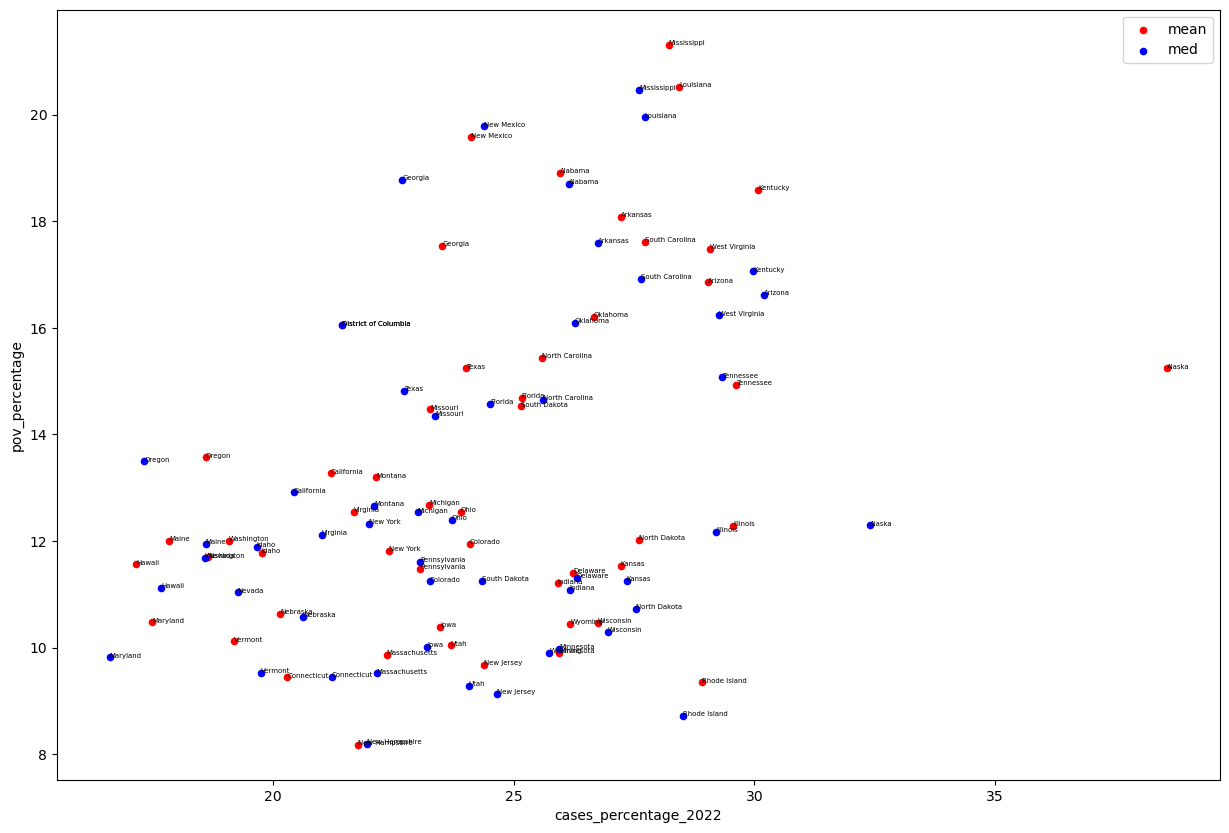

In [35]:
df_state_mean = county_stats.groupby('state').mean(numeric_only = True)
df_state_med = county_stats.groupby('state').median(numeric_only = True)

ax = df_state_mean.plot(kind='scatter', x='cases_percentage_2022', y='pov_percentage', figsize=(15,10), c='red', label='mean')
df_state_med.plot(kind='scatter', x='cases_percentage_2022', y='pov_percentage', figsize=(15,10), c='blue', label='med', ax=ax)
#label each point in scatter plot
for idx, row in df_state_mean.iterrows():
    ax.annotate(idx, (row['cases_percentage_2022'], row['pov_percentage']), fontsize=5)
for idx, row in df_state_med.iterrows():
    ax.annotate(idx, (row['cases_percentage_2022'], row['pov_percentage']), fontsize=5)
plt.show()

C:\Users\matth\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


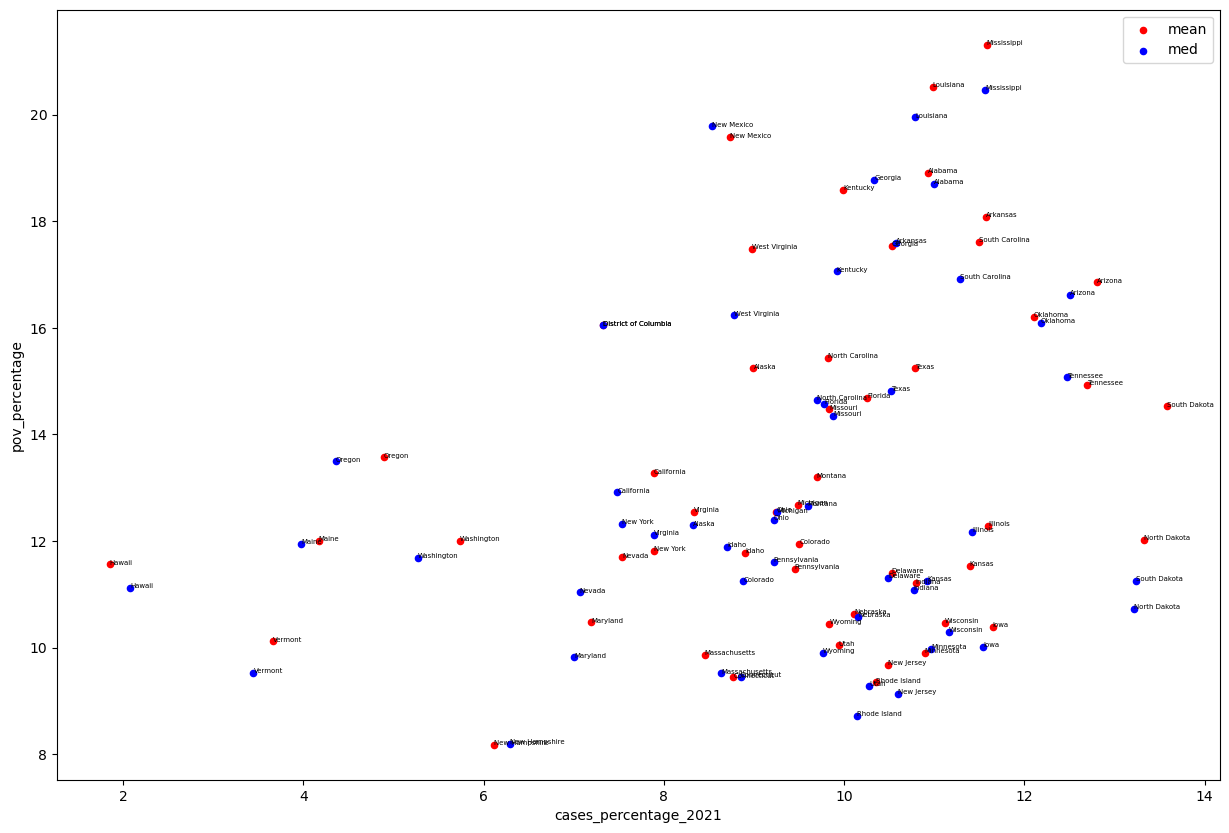

In [36]:
ax = df_state_mean.plot(kind='scatter', x='cases_percentage_2021', y='pov_percentage', figsize=(15,10), c='r', label='mean')
df_state_med.plot(kind='scatter', x='cases_percentage_2021', y='pov_percentage', figsize=(15,10), c='b', label='med', ax=ax)
#label each point in scatter plot
for idx, row in df_state_mean.iterrows():
    ax.annotate(idx, (row['cases_percentage_2021'], row['pov_percentage']), fontsize=5)
for idx, row in df_state_med.iterrows():
    ax.annotate(idx, (row['cases_percentage_2021'], row['pov_percentage']), fontsize=5)
plt.show()

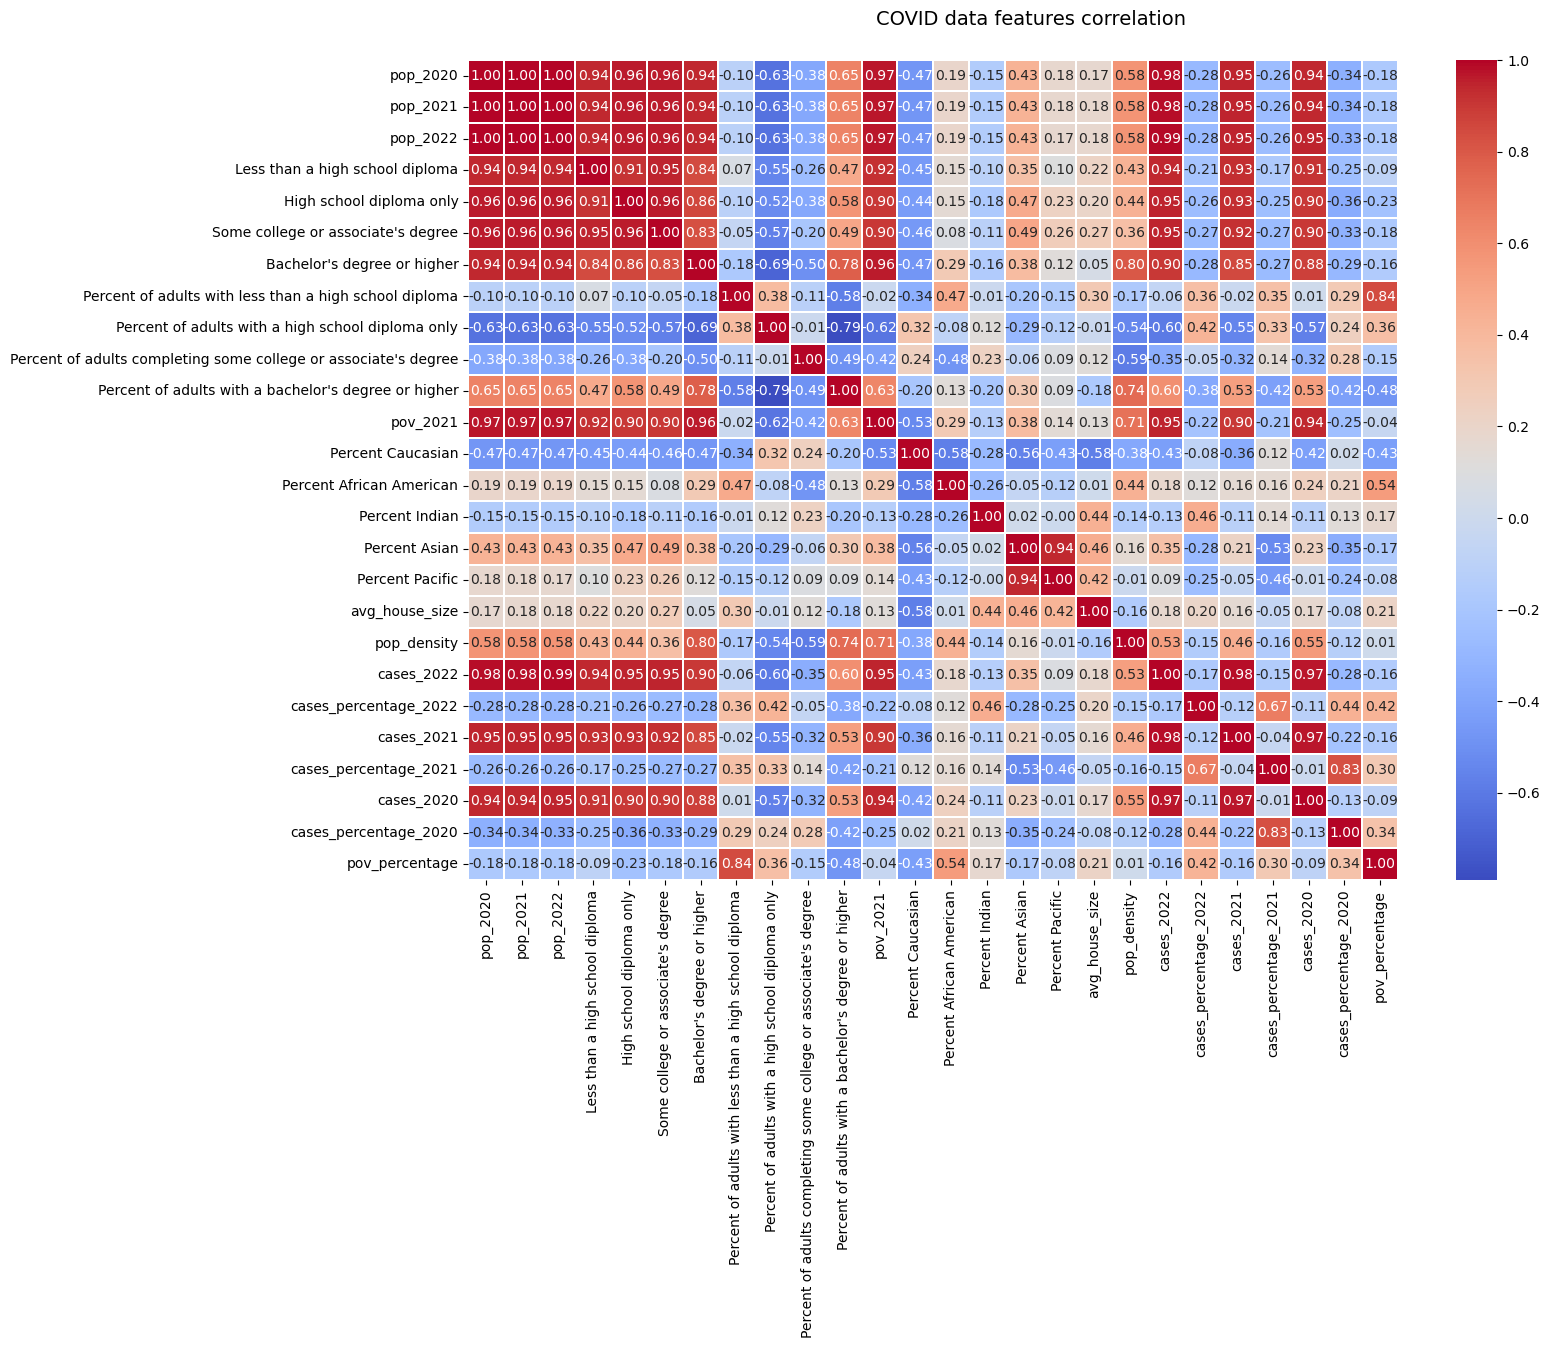

In [37]:
corrmat = df_state_mean.corr()
f, ax = plt.subplots(figsize=(15, 10))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('COVID data features correlation', fontsize=14)

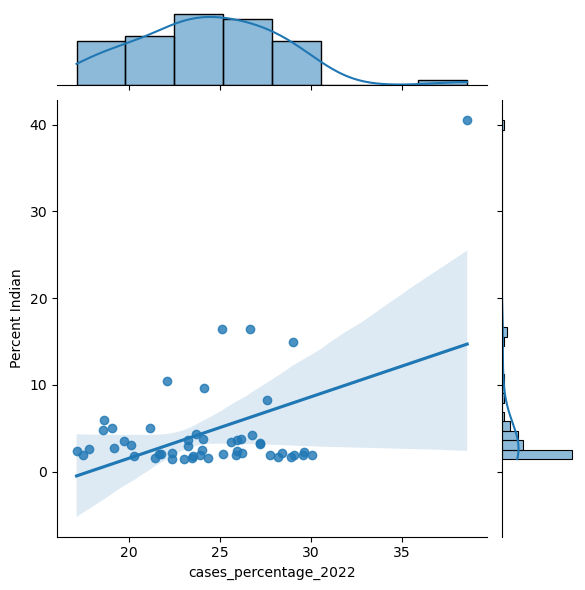

In [38]:
sns.jointplot(x='cases_percentage_2022', y='Percent Indian', data=df_state_mean, kind="reg");

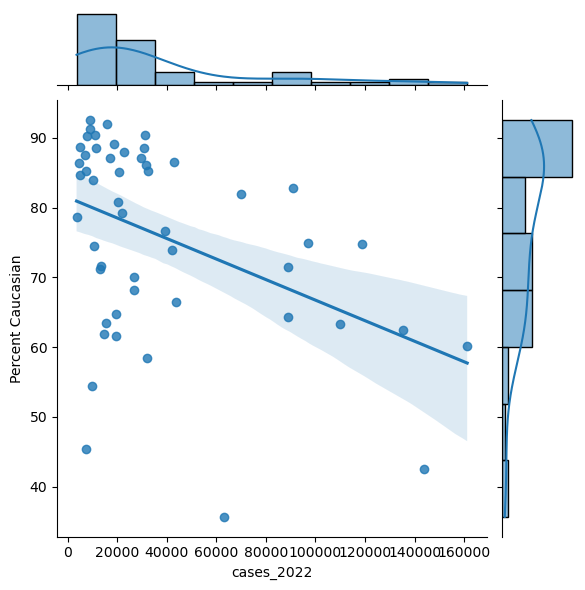

In [39]:
sns.jointplot(x='cases_2022', y='Percent Caucasian', data=df_state_mean, kind="reg");

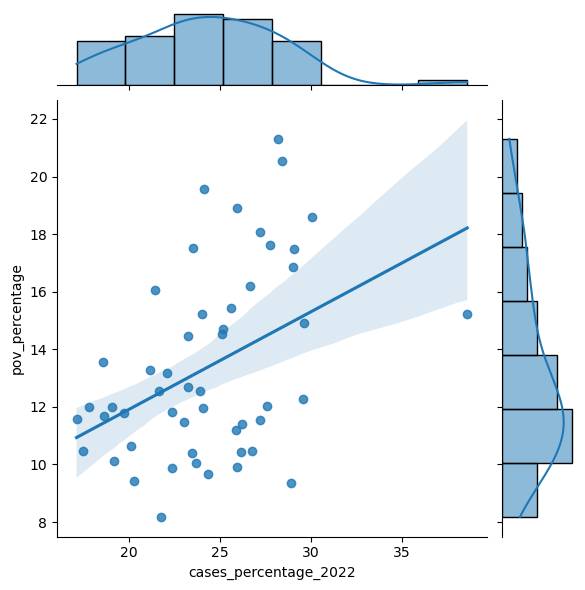

In [40]:
sns.jointplot(x='cases_percentage_2022', y='pov_percentage', data=df_state_mean, kind="reg");

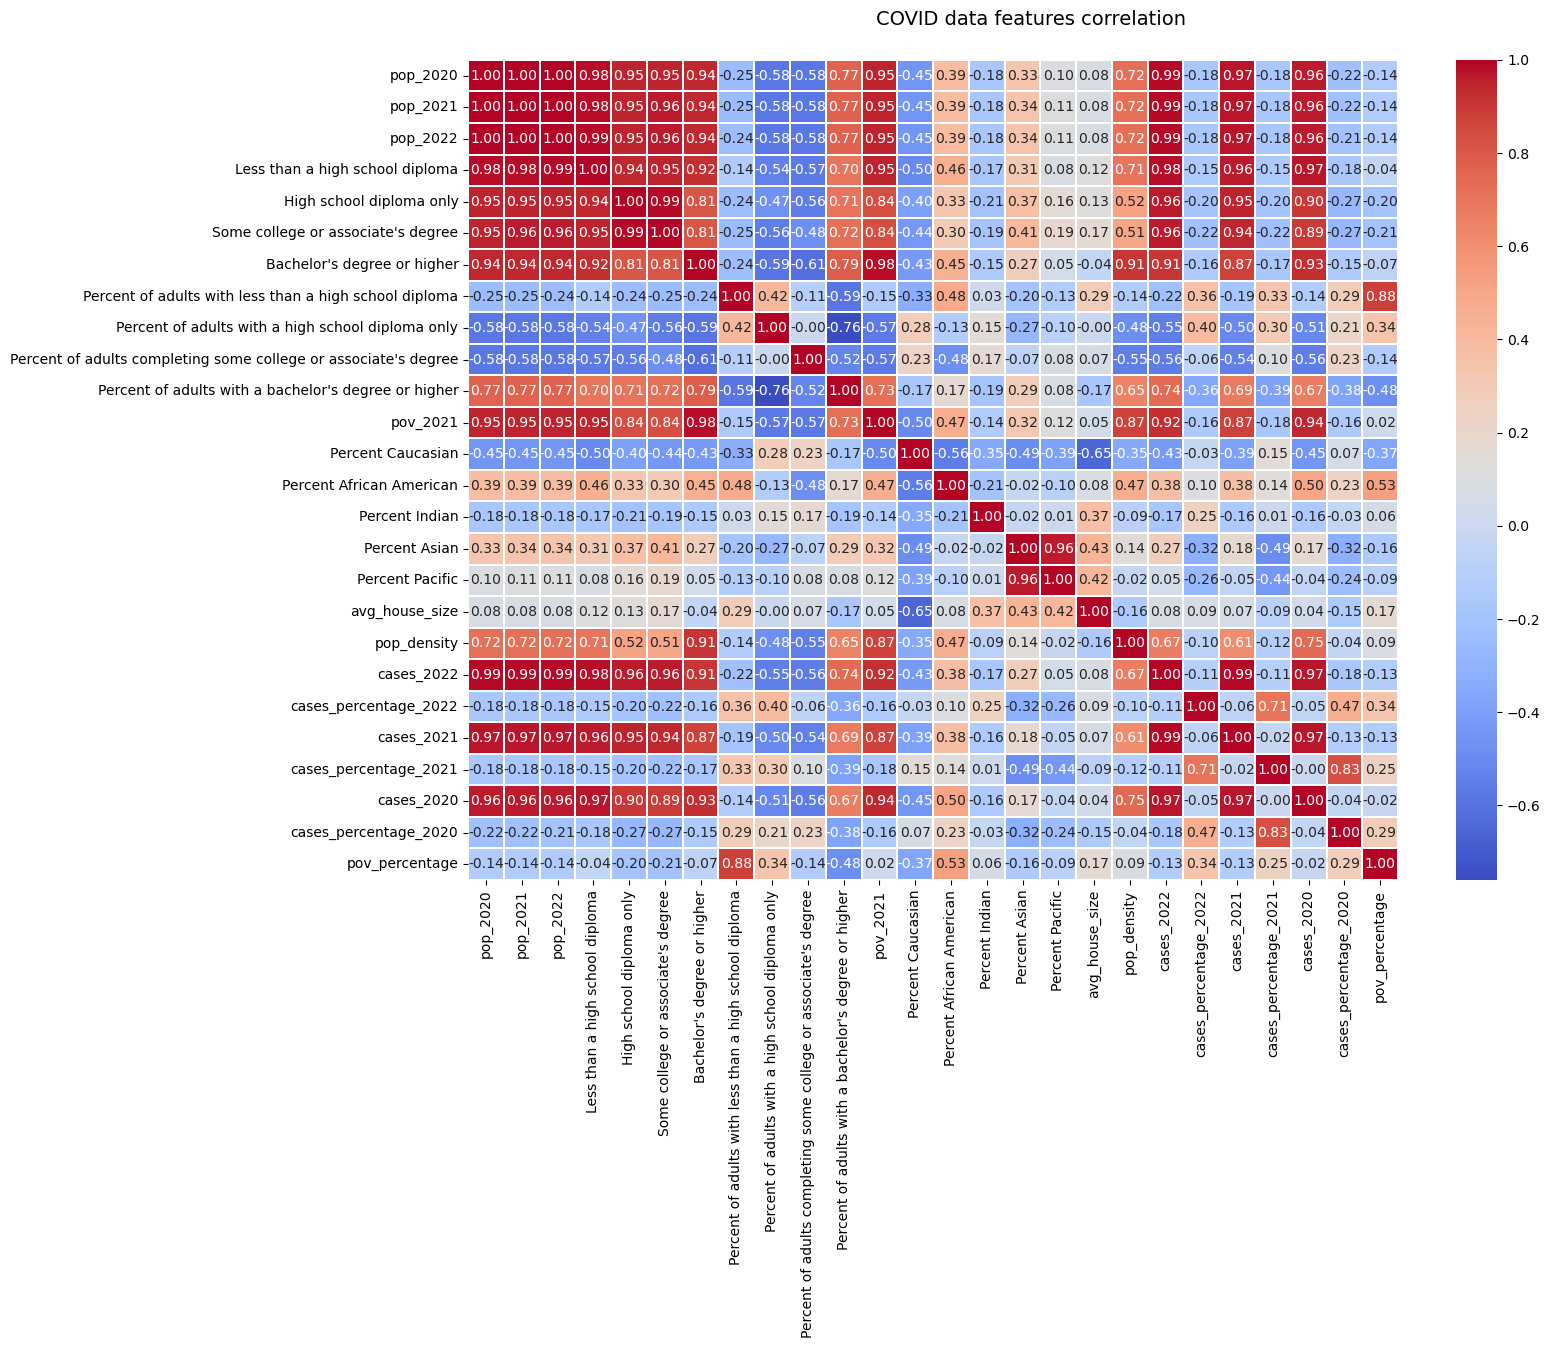

In [41]:
corrmat = df_state_med.corr()
f, ax = plt.subplots(figsize=(15, 10))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('COVID data features correlation', fontsize=14)

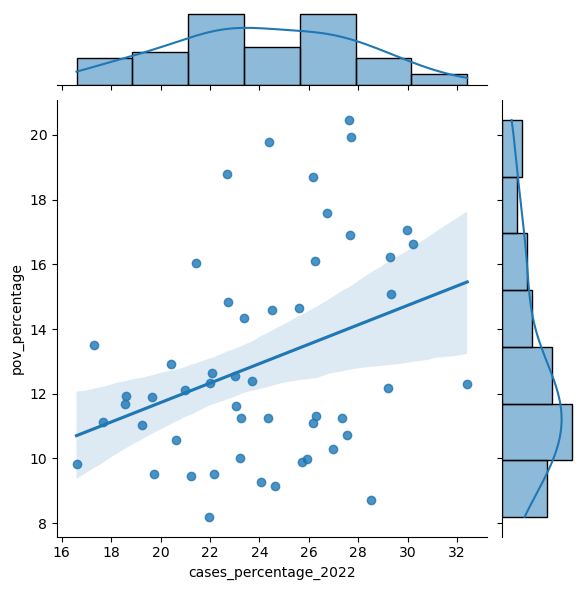

In [42]:
sns.jointplot(x='cases_percentage_2022', y='pov_percentage', data=df_state_med, kind="reg");

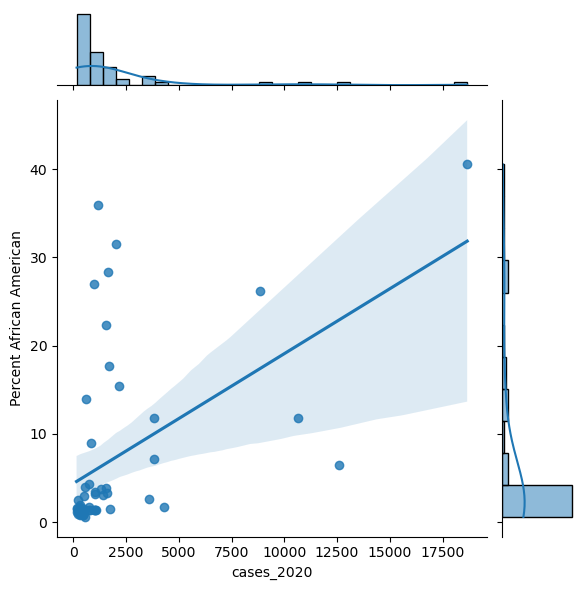

In [43]:
sns.jointplot(x='cases_2020', y='Percent African American', data=df_state_med, kind="reg");

# Conclusion

It is not the easiest to find very strong correlations in the United States due to the nature of the country being a melting pot. We saw some small trends with some given demographics because of an outlier point swinging the correlation (r value). During modeling, we will tune these features even more in order to find better correlations whether it be on an indiviual county level or grouped together by state.

We can now go into our next step of modeling.